<h2 style="font-family:verdana;"> <center> 🚴‍♂️ Fitness Tracker: A Usage Trends Analysis 📈</center> </h2>
<h2 style><center style="color:#159364; font-family:cursive;">Bellabeat Case Study</center></h2>


***

### Table of Content
##### [1. Summary](#heading1)
##### [2. Introduction](#heading2)
##### [3. Data Preparation](#heading3)
##### [4. Data Exploration](#heading4)
##### [5. Analyze and Visualize](#heading5)
##### [6. Discussion](#heading6)
##### [7. Recommendations](#heading7)

<h1 id="heading1">
1. Summary
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading1/">¶</a>
</h1>

This is a case study for Bellabeat - a high-tech design and manufacturing company that produces health-focused smart devices for women. The goal of this report is to provide an analysis of how consumers are using their smart devices gained from a set of thirty Fitbit Fitness users over 31 days of use. Insights gained from the analysis will then hopefully contribute to Bellabeat's marketing team as required by the case study. Bella "Leaf" device is of my own choice to engage throughout the analysis as an attempt to answer these questions:  

1. What are some trends in Fitbit smart device usage?
2. How could these trends apply to Bellabeat customers and help influence Bellabeat marketing strategy?

**Approach:** 

I chose **exploratory approach** for this analysis by asking questions while looking for trends, patterns, and relationships among variables using regression analysis in the data. The aspect I wanted to explore is *users attitude towards the fitness tracker*. Such questions to raise as *how and how often do they use the product?* or *how do they respond to the product used?*. The rationale behind the use of fitness trackers is that understanding users' routine in using a trackable device would be a good start to guide any marketing plan whether it comes to segmentation, positioning or value proposition. Through analysis, I hope to evaluate the next following detailed questions:

- How do they spend their fitness time? 
- What are they influenced by? (product features)

For this purpose, I will be focusing on analyzing data at daily and hourly levels and will disregard data of minute levels. 

**Disclaimer:**  Please note that I have not tested any of these products. All information is research-based. 

<h1 id="heading2">
2. Introduction
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading2/">¶</a>
</h1>

### Bellabeat's Leaf Tracker

![*Bellabeat's wellness tracker Leaf*](http://www.aetherflask.com/wp-content/uploads/2018/12/Bellabeat-Leaf-Chakra-Review-620x400.jpg)

**Product's description:**

> **"Bella Leaf is a classic wellness tracker that can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress. Leaf will automatically track your night-time sleep, there is no need for you to tell the device that you are going to sleep or put it in any kind of sleep mode."** - The company.

> **"...At this moment, Leaf does not track heart rate...Leaf's battery lasts up to 6 months..."** - support.bellabeat.com

> **"Every time that you wish to see new data in your Bellabeat app, you will need to manually sync your Leaf."** - support.bellabeat.com

#### Fitbit Trackers

>**"A Fitbit is a piece of technology that people can wear around their wrist to measure their daily steps, heart rate, and more."** - medicalnewstoday.com

<center>![].<img src="https://watchranker.com/wp-content/uploads/2021/02/fitbit-watches-with-logo.jpg" width="400"></center>

How  Fitbit's <Fitbit> [syncing](https://movespring.com/blog/how-syncing-your-fitness-tracker-works-8) works?

>**"The fitness tracker's sensor records data of accumulated steps in real-time, but the data stays local on the device. The fitness tracker will background sync the activity data to the device app on your phone  (i.e. the Fitbit app) at various intervals. Background syncing usually happens between 1–20 times per day and is up to the fitness tracker and its paired app to determine how often they sync."** - movespring.com

### Fitbit dataset

Data was downloaded from [Fitbit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) from the Kaggle web repository.

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents the use of different types of Fitbit trackers and individual tracking behaviours/preferences. There was no metadata provided. **Limitations such as the size of data sample and the fact that not knowing key information such as participants' demographic characteristics, lifestyle, time location, weather indicators, activity tracker usage** , unfortunately, would limit the scope of analysis that can be performed.

Now that we have the data, the next step is to prepare them for the analysis.  


<h1 id="heading3">
3. Data Preparation
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading3/">¶</a>
</h1>


#### Loading packages and libraries

Packages used: "readr", "tidyverse", "lubridate", "janitor", "dplyr", "tidyr", "skimr", "ggplot2", "openair", "psych", "DataExplorer", "VennDiagram", formattable"

In [1]:
library(readr)  
library(tidyverse)
library(lubridate)
library(janitor)
library(dplyr)
library(tidyr)
library(skimr)
library(ggplot2) 
library(openair)
library(psych) 
library(DataExplorer)
library(VennDiagram)
library(ggpubr)
library(here)
library(formattable)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘psych’


The following object is masked from ‘package:openair’:

    corPlot


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: grid

Loading required package: futile.logger

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names

### Loading CSV files
Data used: **Daily Activity**, **Hourly Steps**, **Hourly Calories**, **Hourly Intensities**, **Sleep Day**, **Heart Rate**, **Weight log**. 

Find data [here](https://www.kaggle.com/arashnic/fitbit).

Raw data was provided as a zip file. After being unzipped, the files were imported to RStudio as data frames and given shorter names for better viewing. 

In [2]:
daily_activity <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\dailyActivity_merged.csv")
hourly_calories <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\hourlyCalories_merged.csv")
hourly_intensities<- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\hourlyIntensities_merged.csv")
hourly_steps <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\hourlySteps_merged.csv")
sleep_day <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\sleepDay_merged.csv")
heart_rate <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\heartrate_seconds_merged.csv")
weight_log <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  TotalIntensity = col_double(),
  AverageIntensity = col_double(

### Data Cleaning/Transforming

First thing is to check if data contains missing values with `sum(is.na(df))`. I found no missing values across data sets, except 65 missing values in one variable in weight_log df but I am not going to deep dive into the weight log data so I just leave it there for now.

**`What do the data sets involve?`**

Let's first take the look at these variables:

(1.) daily_activity data set has these variables: `r colnames(daily_activity)` Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories

(2.) hourly_steps df has these variables: ``r colnames(hourly_steps)`` Id, ActivityHour, StepTotal

(3.) hourly_calories df has these variables: ``r colnames(hourly_calories)`` Id, ActivityHour, Calories

(4.) hourly_intensities df has these variables variables: ``r colnames(hourly_intensities)`` Id, ActivityHour, TotalIntensity, AverageIntensity

(5.) sleep_day df has these variables: ``r colnames(sleep_day)`` Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

(6.) heart_rate df has these variables: ``r colnames(heart_rate)`` Id, Time, Value

(7.) weight_log df has these variables: ``r colnames(weight_log)`` Id, Date, WeightKg, WeightPounds, Fat, BMI, IsManualReport, LogId

In [3]:
# Quick look at view first few rows
head(daily_activity,3)
head(hourly_calories,3)
head(hourly_intensities,3)
head(hourly_steps,3)
head(sleep_day,3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


Notice all data frames have the column “Id” in common that can be used when comes to merging but firstly there are few cleaning steps to do such as: 
​
+ Drop columns that are redundant to reduce computational overhead and better viewing. 
​
+ Naming variables 
​
+ Formatting variables

#### Data transform
For daily steps df:

In [4]:
# Prepare daily_activity table:
daily <- daily_activity %>% 
  clean_names() %>% 
  mutate(activity_date = mdy(activity_date), day_week = weekdays(activity_date)) %>% 
  rename(date = activity_date) %>% 
  select(-c(5:10)) # drop redundant columns 
#Reorder columns by position
daily <- daily[, c(1,2,10,3,9,4:8)]
head(daily)

id,date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728
1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776
1503960366,2016-04-14,Thursday,10460,1776,6.74,30,11,181,1218
1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726
1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773
1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539


Merge hourly related dfs into one:

In [5]:
# Join multiple hourly data 
hourly_activity <- hourly_calories %>% 
  left_join(hourly_intensities, by = c("Id", "ActivityHour")) %>% 
  left_join(hourly_steps, by = c("Id", "ActivityHour")) %>% 
  clean_names() %>% 
  mutate(activity_hour = mdy_hms(activity_hour),
         day_week = weekdays(activity_hour)) %>% 
  separate(col = activity_hour, into  = c("date", "time"), sep = " ") %>% 
  mutate(date = ymd(date)) %>% 
  select(-"average_intensity")
# Reorder columns
hourly_activity <- hourly_activity[,c(1,2,7,3,6,5,4)]

In [6]:
# Prepare sleep_day table
sleep <- sleep_day %>% 
  clean_names() %>% 
  separate(col = sleep_day, c("date", "sleep_time"), sep = " ") %>%
  mutate(date = mdy(date),
         day_week = weekdays(date)) %>% 
  rename("sleep_records" = "total_sleep_records",
        "asleep_mins" = "total_minutes_asleep",
        "bed_mins" = "total_time_in_bed") %>% 
  select(-"sleep_time")
sleep <- sleep[,c(1,2,6,3,4,5)]

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [7]:
# Prepare heartrate data
heartrate <- heart_rate %>% 
  clean_names() %>% 
  mutate(time = mdy_hms(time)) %>% 
  separate(col = time, into = c("date", "datetime"), sep = " ") %>% 
  select(-c(datetime, value)) %>% 
  group_by(id, date) %>% 
  summarise(.groups = "drop")

In [8]:
# Prepare weight log data
weight_log <- weight_log %>% 
  clean_names() %>% 
  mutate(date = mdy_hms(date)) %>% 
  separate(col = date, into = c("date", "datetime"), sep = " ") %>% 
  mutate(date = ymd(date))

Now that all date data was processed, we are able to see `min(date)` and `max(date)` and `n_unique(df$id)` for each data frame:

(1.) daily_activity data available for **2016-04-12** and **2016-05-12** with **33** unique IDs.

(2.) hourly_activity data available for **2016-04-12** and **2016-05-12** with with **33** unique Ids.

(3.) sleep data available for **2016-04-12** and **2016-05-12** with with **24** unique Ids.

(4.) heartrate data available for **2016-04-12** and **2016-05-12** with with **14** unique Ids.

(5.) weight_log data available for **2016-04-12** and **2016-05-12** with with **8** unique Ids.


<h1 id="heading4">
4. Data Exploration
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading4/">¶</a>
</h1>


We can see there is a great discrepancy in the number of unique Ids in steps count, sleep tracking, heart rate monitor, and weight management data, let's find out how the intersection of user Ids based on these product features looks like.

In [9]:
# Generate 4 sets of unique Ids for each feature.
step_ids <- unique(daily$id, incomparables = FALSE)
sleep_ids <- unique(sleep$id, incomparables = FALSE)
heartrate_ids <- unique(heartrate$id, incomparables = FALSE)
weight_ids <- unique(weight_log$id, incomparables = FALSE)
# Plot
venn <- venn.diagram(x = list(step_ids, sleep_ids, heartrate_ids, weight_ids),
  category.names = c("Steps count", "Sleep monitor", "Heart monitor", "Weight tracking"),
  filename = "features_venn.png",
  output=TRUE, imagetype="png",
  lwd = 2, fill = c("skyblue", "pink1", "mediumorchid", "orange"), 
  cex = 1, fontface = "bold", fontfamily = "sans",
  cat.cex = .7, cat.fontface = "bold", cat.default.pos = "outer", cat.fontfamily = "sans")

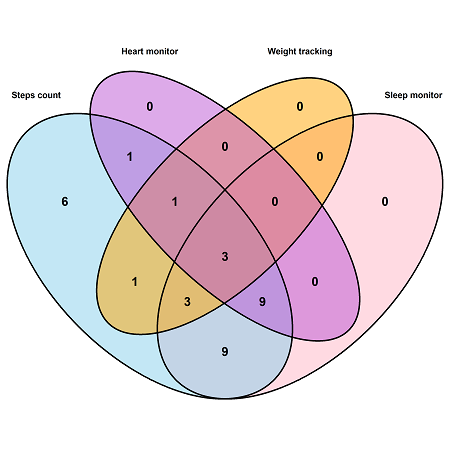

<h6 id="venn">
Venn Diagram of 4 tracking features used by 33 IDs
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/venn/">¶</a>
</h6>

This 4-set Venn Diagram shows that among a total of 33 Ids (100%) there are:

<div style="
           display:fill;
           border-radius:10px;
           background-color: #ffffed;
            letter-spacing:0.5px">
<p style="padding: 10px">  
    
**Multi-feature users:**
    
+ **100%** (33 Ids) have STEPS count records (combine with or without other features)   
+ **73%** (24 Ids) have STEPS count and SLEEP tracking records *(this subgroup is fairly close to that of Bellabeat's users)*
+ **42%** (14 Ids) have STEPS count and HEARTRATE monitoring records
+ **24%** (8 Ids) have STEPS count and WEIGHT tracking records
+ **9%** (3 Ids) have all four featured records of STEPS - SLEEP - HEARTRATE - WEIGHT
    
Of which:

<div style="
           display:fill;
           border-radius:10px;
           background-color: #F0FFD8;
            letter-spacing:0.5px">
<p style="padding: 10px">
    
**Single-feature records or users:**

+ 18% (6 Ids) have only STEPS count records (no other features being used)

**Duo-feature users:**

+ 27% (9 Ids) have only duo-feature of STEPS - SLEEP records *(This subgroup is the closest one to that of Bellabeat's Leaf users as purely recorded Steps - Sleep)*
+ 1 id has only the duo feature of STEPS - WEIGHT record
+ 1 id has duo feature of STEPS - HEARTRATE record

**Trio_feature users:**

* 27% (9 ids) used 3 features of STEPS - SLEEP - HEARTRATE
* 9% (3 ids) used 3 features of STEPS - SLEEP - WEIGHT
* 1 id used trio-feature STEPS - HEARTRATE - WEIGHT

**Features with 0 users:**

* 0 Id used only HEARTRATE or WEIGHT or SLEEP feature alone
* 0 Id used only duo features of HEARTRATE - WEIGHT or SLEEP - WEIGHT or HEARTRATE - SLEEP

<div style="
           display:fill;
           border-radius:10px;
           background-color: #FFFFE0;
            letter-spacing:0.5px">
<p style="padding: 10px">
The user group of 9 Ids that have only a duo-feature of STEPS - SLEEP records is the closest to Leaf users. Unfortunately, the sample for this segment is relatively small, I would go ahead analyzing the 24 Ids group (even though a greater number sample would have been better) by inner-joining 2 daily data frames of STEPS and SLEEP.

In [10]:
# Check which IDs have both STEPS and SLEEP records:
sleep_ids[sleep_ids %in% step_ids]

[1] 1503960366 1644430081 1844505072 1927972279 2026352035 2320127002
 [7] 2347167796 3977333714 4020332650 4319703577 4388161847 4445114986
[13] 4558609924 4702921684 5553957443 5577150313 6117666160 6775888955
[19] 6962181067 7007744171 7086361926 8053475328 8378563200 8792009665

Steps and Sleep tracking are the main features of Bellabeat's Leaf measure. Let's join these two data frames for an in and out view.

**Merge, delete replicates and observe the new data frame:**

In [11]:
# Merge the two dfs
step_sleep <- merge(daily, sleep, by = c("id", "date", "day_week"))
# There are replicates after merging dfs need to remove
step_sleep <- step_sleep[!duplicated(step_sleep), ]
# Check data
head(step_sleep)
nrow(step_sleep)
n_unique(step_sleep$id)

,id,date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sleep_records,asleep_mins,bed_mins
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728,1,327,346
2,1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776,2,384,407
3,1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726,1,412,442
4,1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773,2,340,367
5,1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539,1,700,712
6,1503960366,2016-04-19,Tuesday,15506,2035,9.88,50,31,264,775,1,304,320


[1] 410

[1] 24

Now let's take a look at the shape, distribution of the variables of the new data frame we have so far:

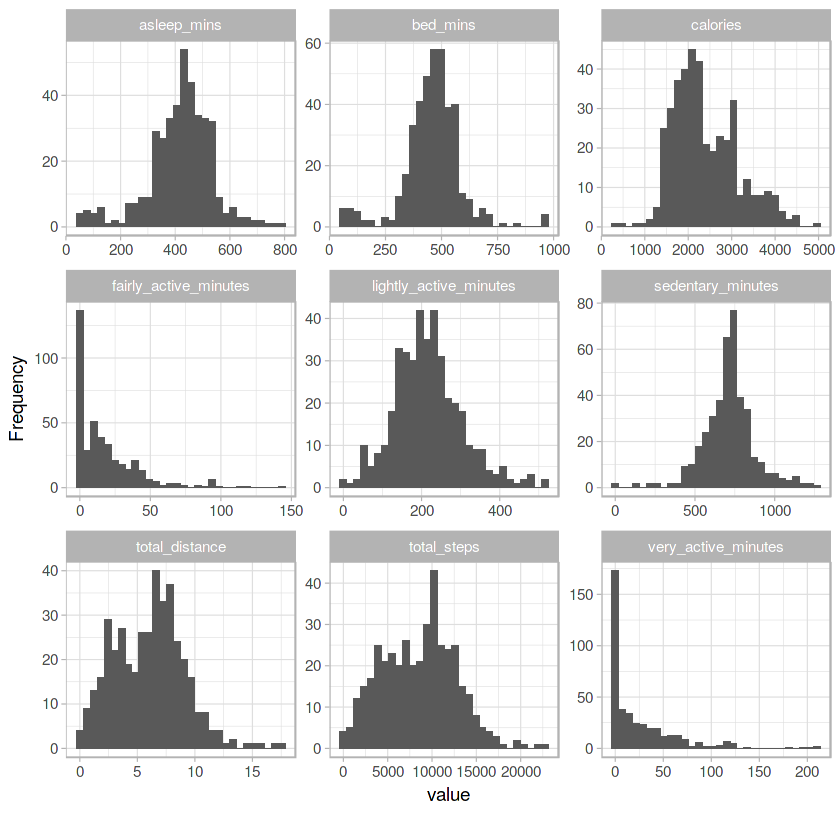

In [12]:
step_sleep %>% select(-c("id", "sleep_records")) %>% plot_histogram(ncol = 3, ggtheme = theme_light())
options(repr.plot.width = 20, repr.plot.height = 8)

<h4 id="valid">
Data Validity
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/valid/">¶</a>
</h4>

"Asleep minutes", "bed-stay minutes", "lightly minutes", "sedentary minutes" are variables that have peaked bars with most of the values bunched up in the middle of the histograms, with few values spread along both the right and left tails might reveal some potential inaccuracies - potentially due to improper wearable usage. For example, users might not change sleep sensitivity settings or there is a battery issue.

The "Total steps" variable has a peak bar with the mass of the distribution concentrated in the middle of the figure and few values spread the right tail. This tells us that the data points are not normally distributed. In addition, the plot reveals the presence of few extreme values in the lower right bound of the plot. This could be a measurement error (e.g, possibility of false "hand" steps when wrist-worn) - but could also be when users took extra exercises on those particular days.

"Very active minutes", "fairly active minutes" are positively skewed with the majority of the data points are clustered on the left side, mainly at zero value. This could be a technical error when a device doesn't sync to the user's phone app - one of the many tracking issues according to [Fitbit Community](https://community.fitbit.com/t5/Other-Versa-Smartwatches/Active-minutes-disappearing/td-p/3190997/page/2) or could be that users didn't perform any form of exercises in those days. There are also few outliers in the right bound with values greater than 100 mins.

<h1 id="heading5">
5. Analyze and Visualize
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading5/">¶</a>
</h1>

<div style="
           display:fill;
           border-radius:5px;
           background-color: #F0FFD8;
            letter-spacing:0.5px">
<p style="padding: 5px">
 
Primary question:    
#### What are some trends in smart device usage?
***

I will break this question down into chunks and make it simpler and easier to answer.

**`Q. What is smart device usage by features?`**

As illustrated in [Venn Diagram](#venn) of features used by users in the sample.

**`Q. Is there any trend in daily usage?`**

Let's first gather few ideas into how users spent their steps at a day level. This calendar-based map illustrates the average steps taken per user by each day in the given period. Through the heat map, we can easily look over the frequency of steps by each day and users' daily rhythms may reveal.

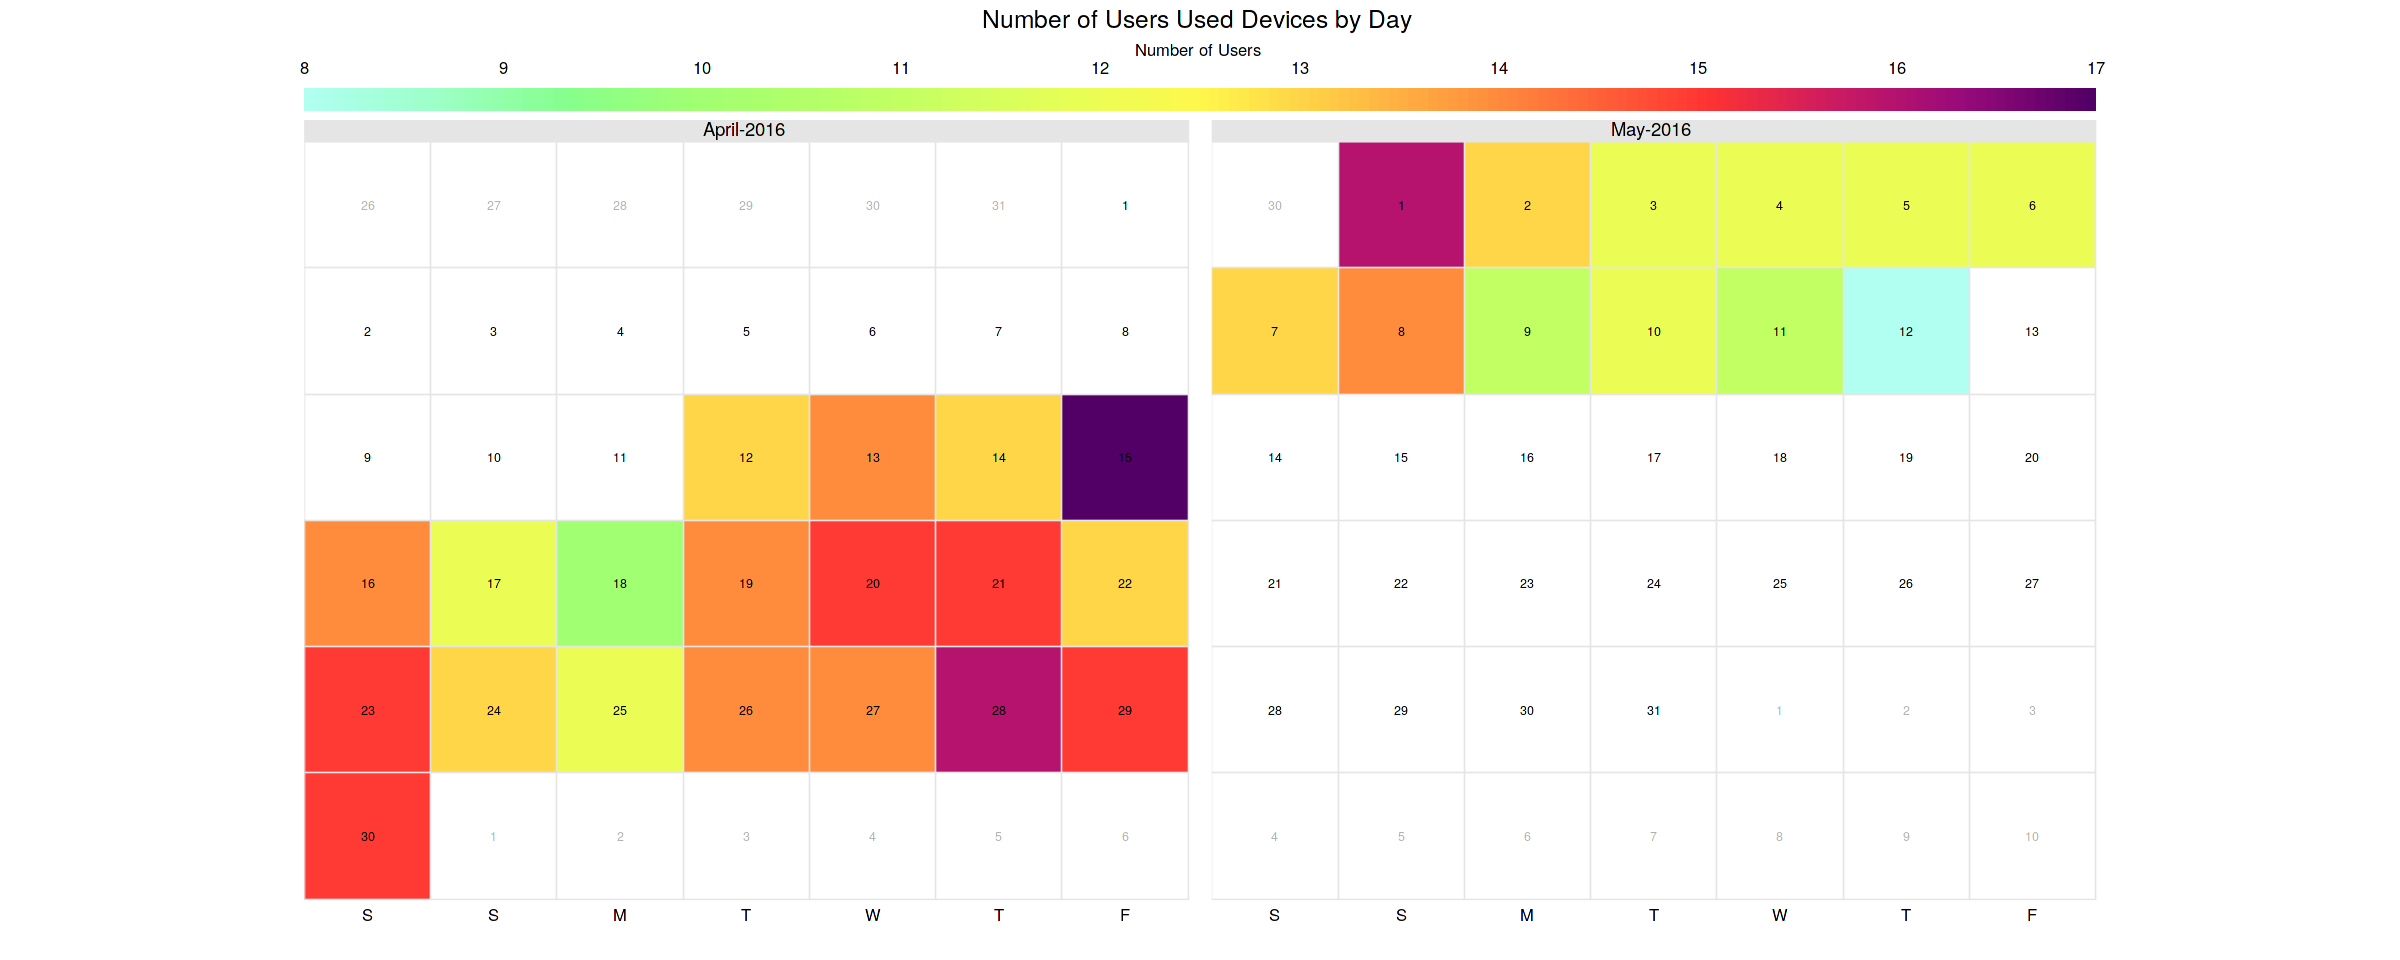

In [13]:
# Get number of users used their devices each day:
obs_users <- step_sleep %>% group_by(date) %>% 
  summarise(user_perday = sum(n()), .groups = "drop")
#Plot a calendar heat map on total steps by day
calendarPlot(obs_users, pollutant = "user_perday", year = 2016, month = 4:5,  cex.lim = c(0.6, 1), main = "Number of Users Used Devices by Day", cols="increment", key.header = "Number of Users", key.position = "top")
options(repr.plot.width = 14, repr.plot.height = 10)

In [14]:
# Summary of users per day
summary(obs_users$user_perday)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   12.00   13.00   13.23   14.50   17.00 

**Daily usage at first glance:** 

Within an **31** days of data recorded I wouldn't expect to see a clear daily trend in a Caldendar plot, however, we can still see few interesting points here:

- Of a total of 24 Ids (100%), the number of users who used their devices daily can vary from as little as 33% (8 users) to as many as 71%  (17 users) each day. The greatest number of users per day is around double that of the least number of user per day.

- Participants used their devices more frequently in the first half of the period than days towards the end.

In [15]:
obs_users <- step_sleep %>% group_by(date) %>% 
  summarise(user_perday = sum(n()), .groups = "drop") %>%  arrange(user_perday)
head(obs_users)

date,user_perday
<date>,<int>
2016-05-12,8
2016-04-18,10
2016-05-09,11
2016-05-11,11
2016-04-17,12
2016-04-25,12


In [16]:
# Get number of days a user used their device in a 31 day period:
obs_days <- step_sleep %>% group_by(id) %>% 
  summarise(num_dayuse = sum(n()), .groups = "drop") %>% 
  arrange(-num_dayuse)
summary(obs_days$num_dayuse)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.75   20.50   17.08   27.25   31.00 

In [17]:
# Classify users into usage ranges
usage <- obs_days %>% 
  mutate(group = case_when(
    between(num_dayuse, 1, 10) ~ "low usage",
    between(num_dayuse, 11, 20) ~ "moderate usage",
    between(num_dayuse, 21, 31) ~ "high usage",
    TRUE ~ NA_character_
    ))
# Create a df with new attributes
usage_df <- step_sleep %>% 
  left_join(usage, by = "id")
# Compute percentage of each usage groups 
sum_usage <- usage %>% 
  mutate(group = fct_relevel(group, c("high usage", "moderate usage", "low usage"))) %>% 
  group_by(group) %>%  
  summarise(num_users = n()) %>% 
  mutate(percent = num_users/sum(num_users)*100)

In [18]:
formattable(sum_usage, list(percent = color_bar("yellow")))

group,num_users,percent
<fct>,<int>,<dbl>
high usage,12,50.0
moderate usage,3,12.5
low usage,9,37.5


In general, users didn't wear their devices on a day in day out basis. This is not a surprising fact, although after observing the number of days each user wore their fitness tracker (or had data on that day), I have noticed that surprisingly some users would keep their devices on daily or almost every day (n = 27 ~ 31 days) while few of them used their devices just only a few days and others reached the average number of days in the recording period. 

**Stats:**

- **50%** of users who used their devices frequently on a nearly day-in-day-out basis (on a `21-31` day scale),

- **12%** of users who moderately used their devices (on an `11-20` day scale), 

- **38%** of users who used  their devices least frequently (on a `1-10` day scale)

At this point, I am interested to know to some extend how differently these different group of users responded towards the use of fitness trackers. Therefore, I divided users into the three distinct user groups based on their usage levels: **highly**, **moderate** and **low usage** from this point onward.

**`Q. Trends on performances among groups?`**

**Active levels comparison**

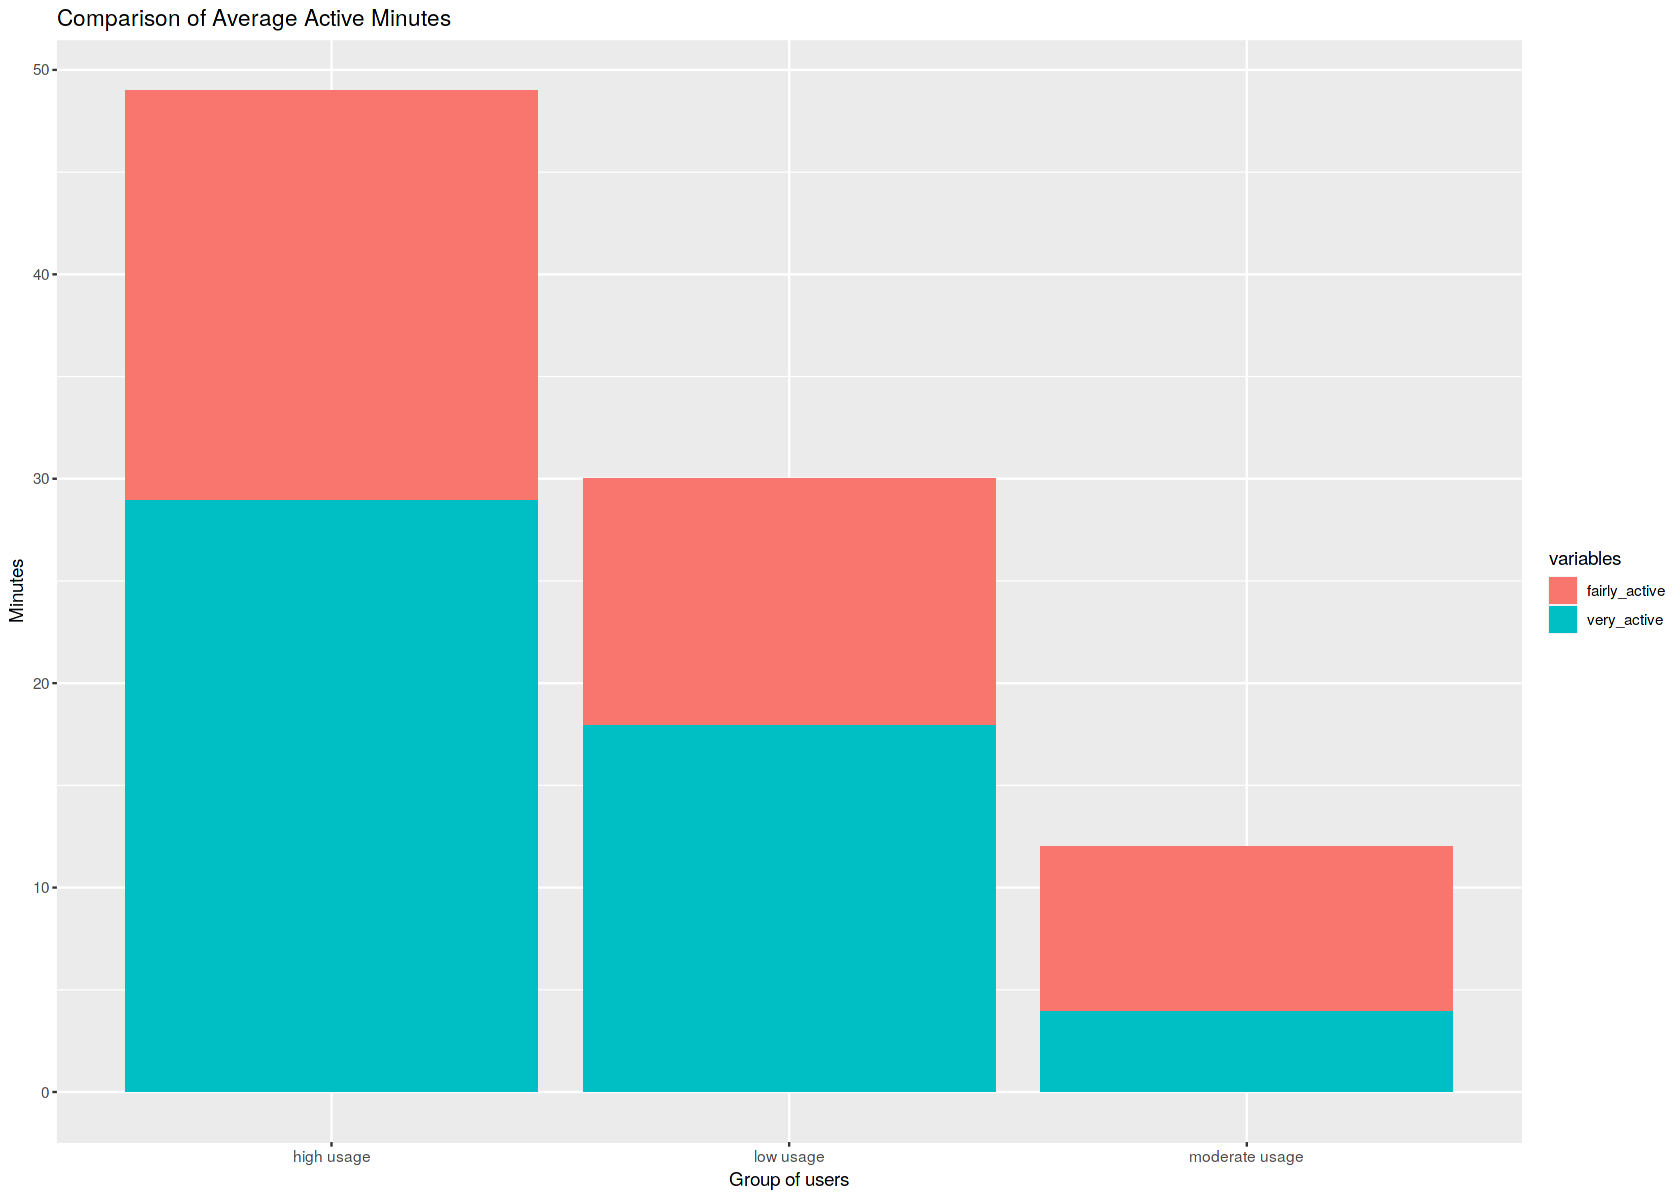

In [19]:
# Summarise Active minutes by days
active1 <- usage_df %>% 
  group_by(group) %>% 
  summarise(very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0), .groups = "drop")
# Reshape data 
active1_long <- gather(data = active1, key = "variables", value = "value", -group)
# Plot very active and fairly active minutes per day
active1_long %>% 
  ggplot()+ geom_col(aes(x= group, y=value, group=variables, fill=variables))+
  theme(axis.text.x = element_text(size = 9))+
  labs(x="Group of users" , y="Minutes")+
  ggtitle("Comparison of Average Active Minutes")
options(repr.plot.width = 8, repr.plot.height = 5)

In general, the group of users who exercised frequently also performed more vigorously/intensively with the longest duration of active minutes. Users who had the least days of exercising spent longer time exercising than those who had a medium number of days of performing.

In [20]:
# Get data for average activities on a day scale
usage_hr <- usage_df %>% group_by(group, date, id, day_week) %>% 
  mutate(total_mins = sum(very_active_minutes, fairly_active_minutes, lightly_active_minutes, bed_mins)) %>%   summarise(steps = round(mean(total_steps),0),
            distance = round(mean(total_distance),0),
    very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0),
            lightly_active = round(mean(lightly_active_minutes),0),
            sedentary_hr = round(mean(sedentary_minutes)/60,2),
            bed_hr = round(mean(bed_mins)/60,2),
            asleep_hr = round(mean(asleep_mins)/60,2),
            avg_hr = round(sum(very_active, fairly_active, lightly_active, sedentary_minutes, bed_mins)/60,2), .groups = "drop")
head(usage_hr)

group,date,id,day_week,steps,distance,very_active,fairly_active,lightly_active,sedentary_hr,bed_hr,asleep_hr,avg_hr
<chr>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high usage,2016-04-12,1503960366,Tuesday,13162,8,25,13,328,12.13,5.77,5.45,24.00
high usage,2016-04-12,2026352035,Tuesday,4414,3,3,8,181,11.77,9.10,8.38,24.07
high usage,2016-04-12,3977333714,Tuesday,8856,6,44,19,131,12.95,7.82,4.57,24.00
high usage,2016-04-12,4445114986,Tuesday,3276,2,0,0,196,13.12,7.62,7.15,24.00
high usage,2016-04-12,4702921684,Tuesday,7213,6,0,0,263,11.97,7.32,7.08,23.67
high usage,2016-04-12,5553957443,Tuesday,11596,8,19,13,277,12.78,7.73,7.35,25.67


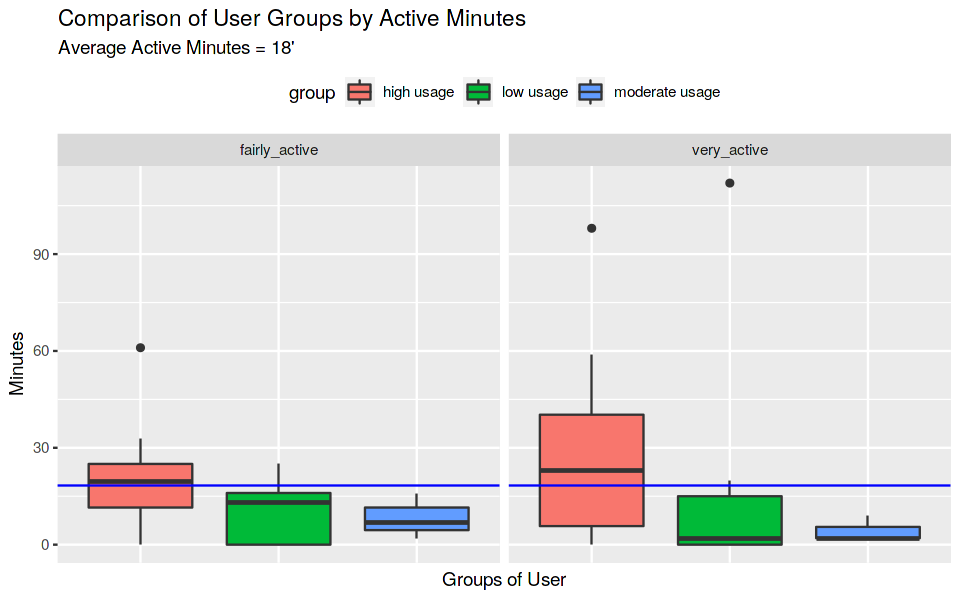

In [21]:
# Compare user groups by their average very active minutes
# Summarise Active minutes by groups
active <- usage_hr %>% 
  group_by(group, id) %>% 
  summarise(very_active = round(mean(very_active),0),
            fairly_active = round(mean(fairly_active),0), 
            .groups = "drop")
# Reshape data 
active_long <- gather(data = active, key = "variables", value = "value", -c(group, id))
# Plot data
ggplot(active_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  geom_hline(yintercept = mean(active_long$value), color = "blue")+
  xlab("Groups of User") + ylab("Minutes") +
   ggtitle("Comparison of User Groups by Active Minutes", "Average Active Minutes = 18'")+
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())+
  theme(legend.position = "top")+
facet_wrap(~variables)
options(repr.plot.width = 12, repr.plot.height = 6)

Compare to an average number of 18 active minutes, similarly to previous observations, the high usage group is the best-performer in both intensity levels. We can also see from the boxplot there are few users with an extremely high amount of time in both high and low usage groups.

**Active minutes among groups based on days of the week**

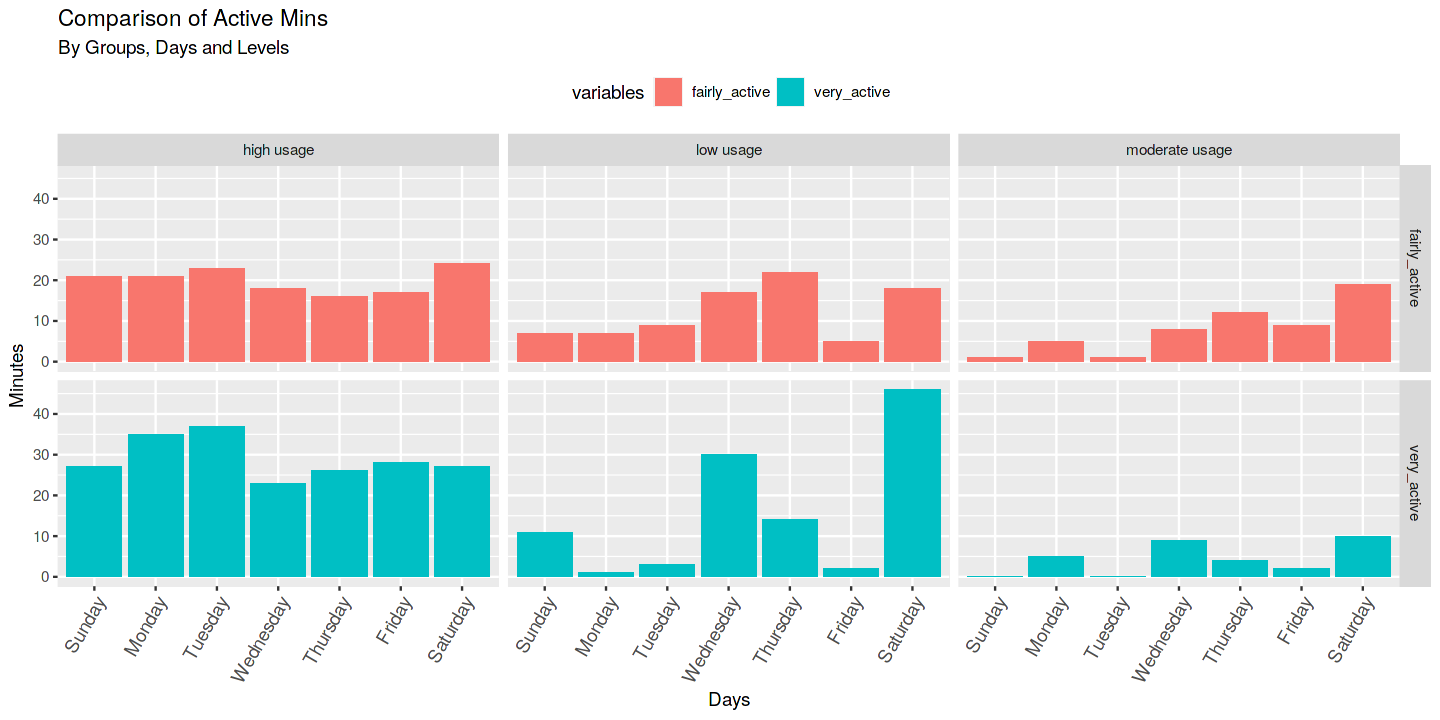

In [22]:
# Summarise Active minutes by days
active2 <- usage_df %>% 
  group_by(day_week, group) %>% 
  summarise(very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0),.groups = "drop")
# Reshape data 
active2_long <- gather(data = active2, key = "variables", value = "value", -c(group,day_week))
# Plot data
active2_long %>% mutate(day_week = fct_relevel(day_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  ggplot()+ geom_col(aes(x= day_week, y=value, fill=variables))+
  theme(axis.text.x = element_text(size = 11, angle = 60, hjust = 1, vjust = 1))+
  theme(legend.position = "top")+
  labs(x="Days" , y="Minutes")+
  ggtitle("Comparison of Active Mins", "By Groups, Days and Levels")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 6)

High usage group of users have a rather regular pattern of daily exercising on both workdays and weekends, particularly more intense on days at the beginning of the week (Mons-Tues) and slightly more than workday's average on Sats; low and moderate usage groups of users don't seem to follow any particular routine of performing.

**Low active and Inactive comparison among groups**

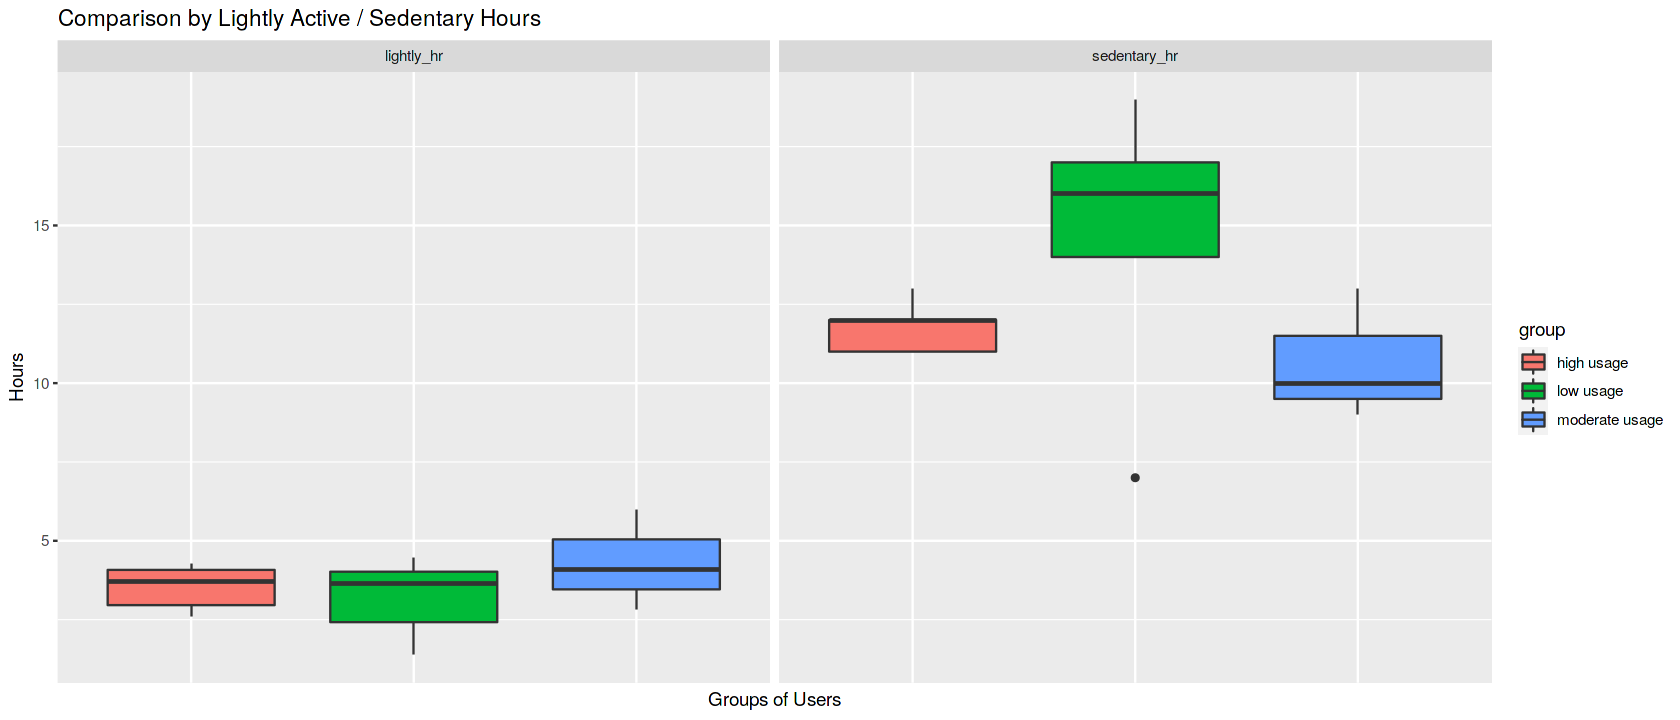

In [23]:
lightly <- usage_hr %>% 
  group_by(group, id) %>% 
  summarise(lightly_hr = round(mean(lightly_active)/60,2),.groups = "drop")
low_ints <- usage_hr %>% 
  group_by(group, id) %>% 
  summarise(lightly_hr = round(mean(lightly_active)/60,2),
            sedentary_hr = round(mean(sedentary_hr),0), .groups = "drop")
# Reshape data 
low_ints_long <- gather(data = low_ints, key = "variables", value = "value", -c(group, id))
# Plot lightly active minutes per day
ggplot(low_ints_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  xlab("Groups of Users") + ylab("Hours") +
  ggtitle("Comparison by Lightly Active / Sedentary Hours")+
   theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())+
  facet_wrap(~variables)
options(repr.plot.width = 14, repr.plot.height = 8)

- Moderate usage group tends to spend most hours in *low active* activities and least *sedentary* hours than other groups.

- Those users who used their devices least days had the longest number of sedentary hours.


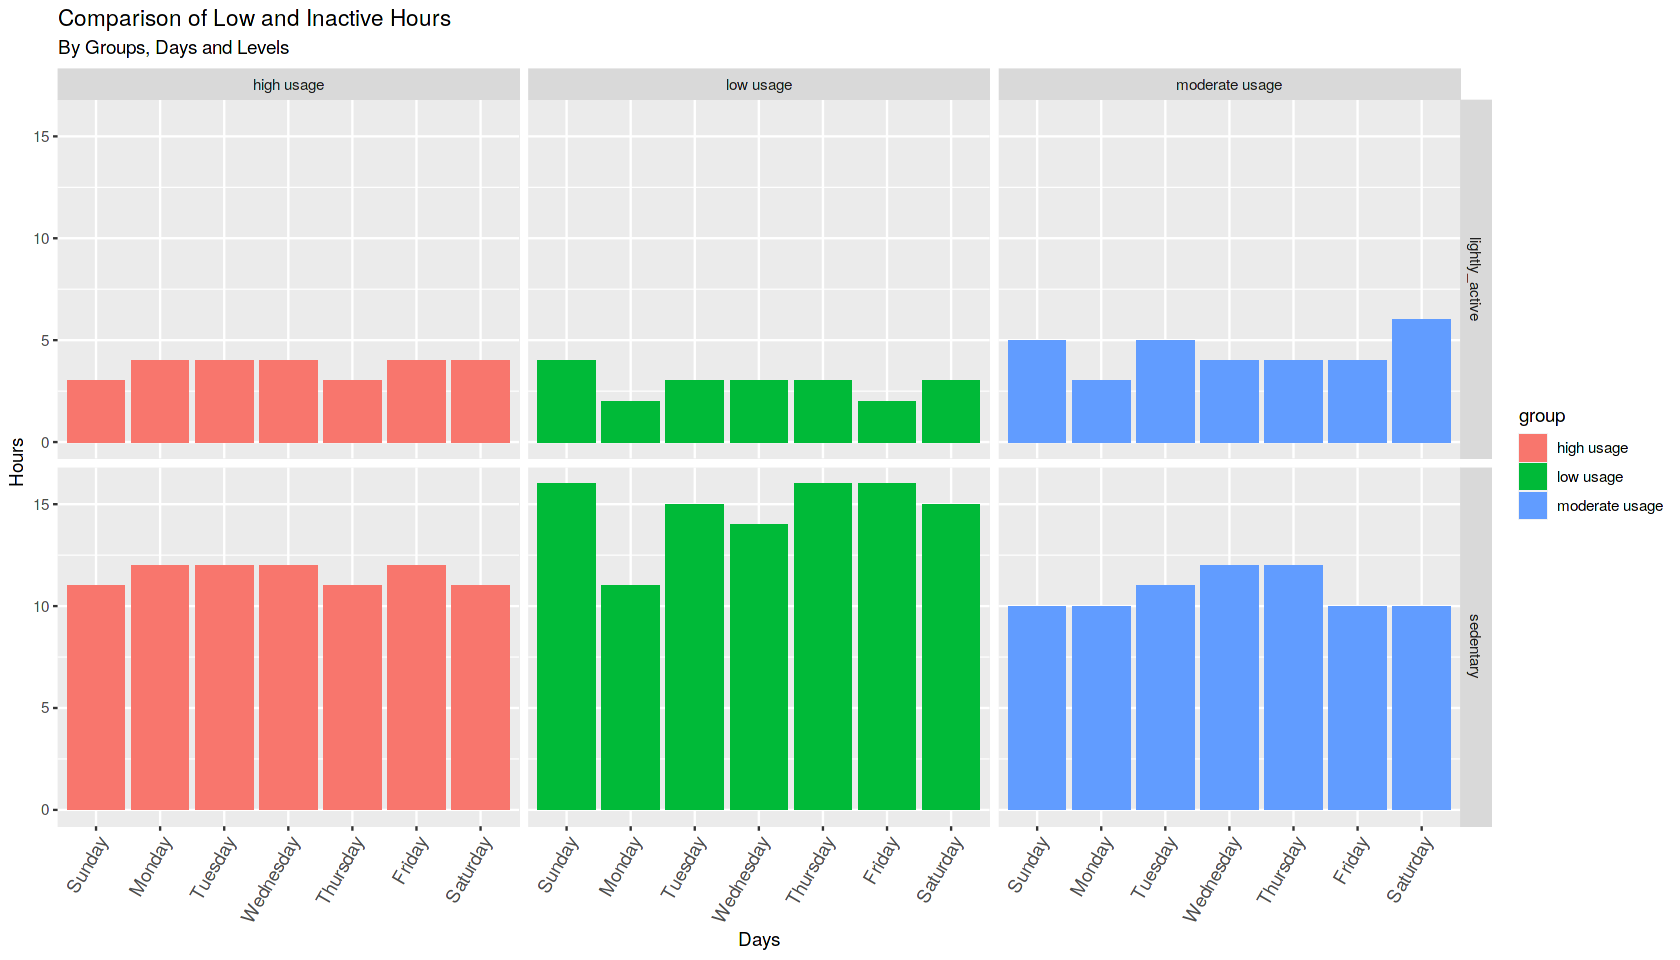

In [24]:
# Summarise Low active and Inactive minutes by days
low_act <- usage_df %>% 
  group_by(day_week, group) %>% 
  summarise(lightly_active = round(mean(lightly_active_minutes)/60,0),
            sedentary = round(mean(sedentary_minutes)/60,0),.groups = "drop")
# Reshape data 
lowact_long <- gather(data = low_act, key = "variables", value = "value", -c(group,day_week))
# Plot very active and fairly active minutes per day
lowact_long %>% mutate(day_week = fct_relevel(day_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
ggplot()+ geom_col(aes(x= day_week, y=value, group=variables, fill=group))+
  theme(axis.text.x = element_text(size=11, angle = 60, hjust = 1, vjust = 1))+
  labs(x="Days" , y="Hours")+
  ggtitle("Comparison of Low and Inactive Hours", "By Groups, Days and Levels")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 8)

- High usage group: spent up their light activity hours and inactive hours during workdays and being less active during weekend.
- Low usage group has the most inactive hours of the three.
- Moderate users tend to be most lightly active over the weekend.

**Rest hours comparison among groups**

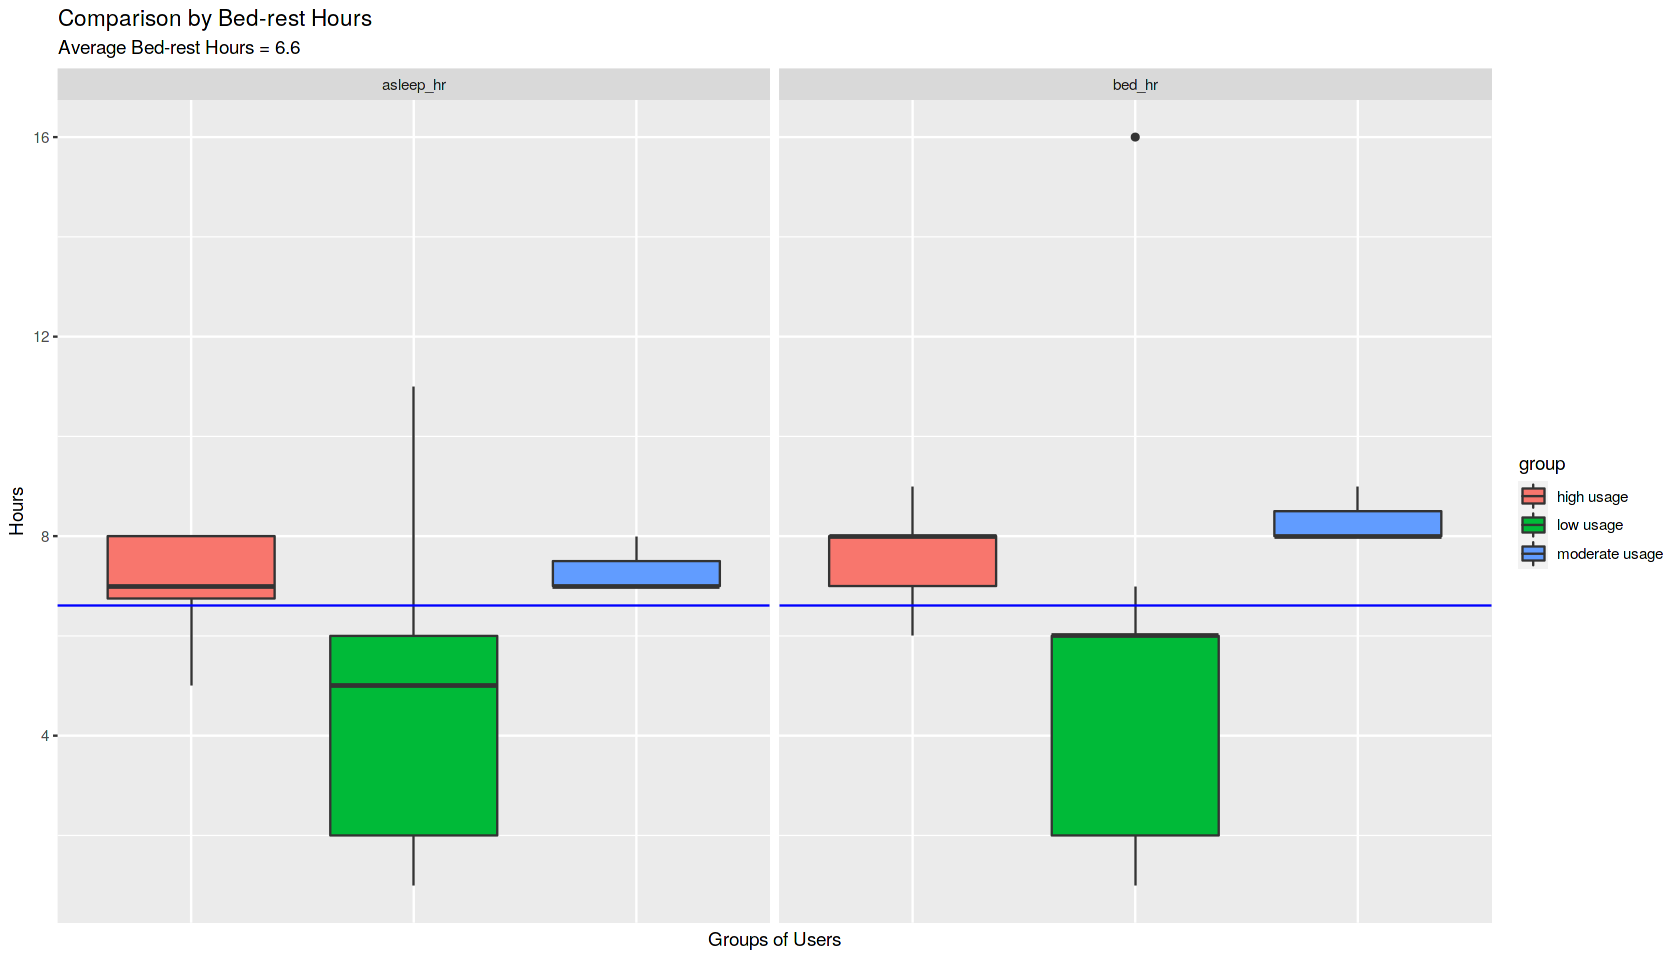

In [25]:
# Summarise bed-rest hours by days
vars <- usage_hr %>% 
  group_by(group, id) %>% 
  summarise(bed_hr = round(mean(bed_hr),0), asleep_hr = round(mean(asleep_hr),0), .groups = "drop")
# Reshape data 
vars_long <- gather(data = vars, key = "variables", value = "value", -c(group, id))
# Plot very active and fairly active minutes per day
ggplot(vars_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  geom_hline(yintercept = mean(vars_long$value), color = "blue")+
  xlab("Groups of Users") + ylab("Hours") +
  ggtitle("Comparison by Bed-rest Hours", "Average Bed-rest Hours = 6.6")+
   theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())+
  facet_grid(~variables)
options(repr.plot.width = 14, repr.plot.height = 6)

The low usage group have their sleep hours and rest hours varied the most (between 2-6 hour) and tend to have insufficient sleep while the high and moderate usage groups steadily stuck with their bed routine and had sufficient sleep.

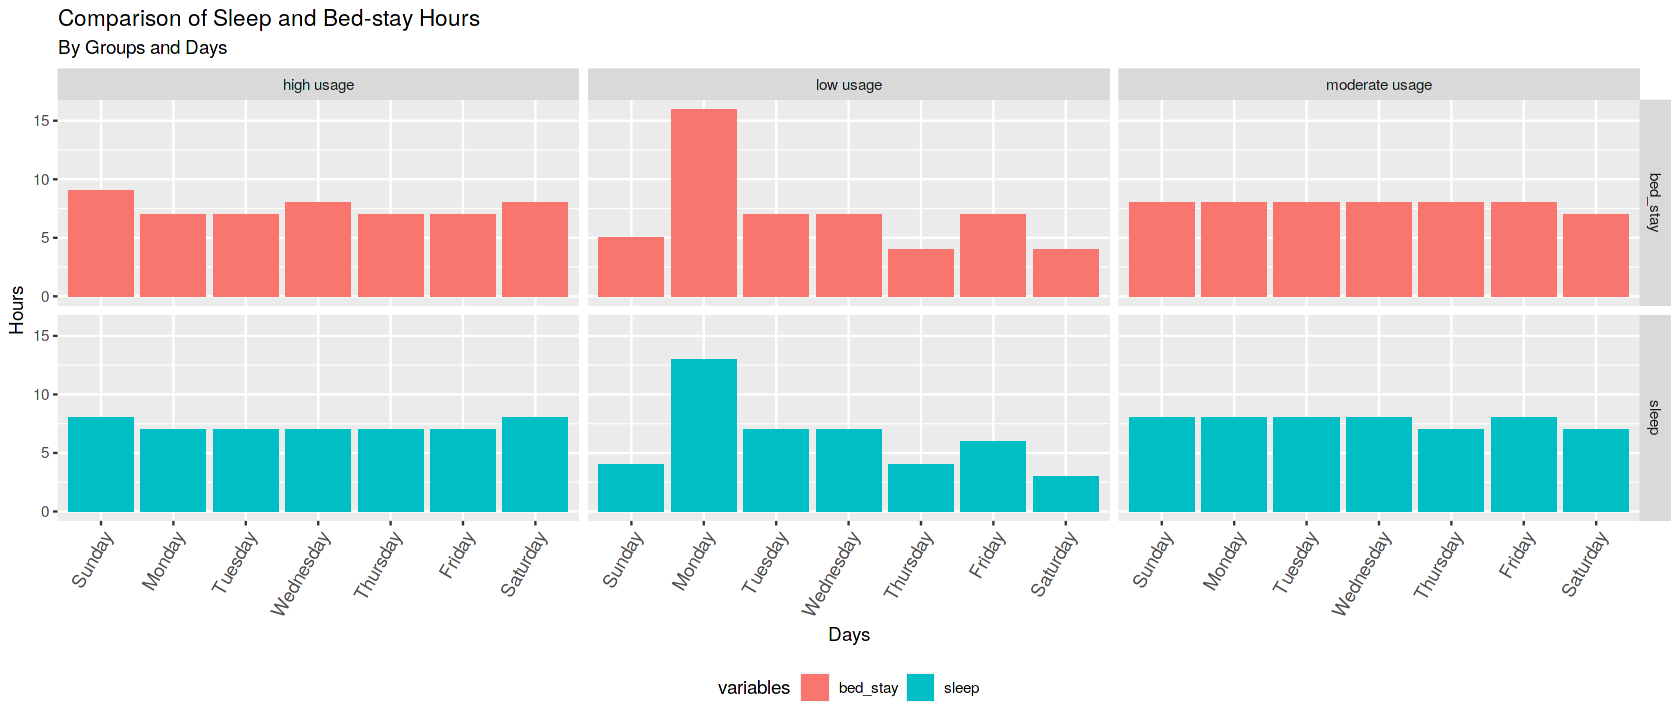

In [26]:
# Summarise Rest Hours by days
rest <- usage_df %>% 
  group_by(day_week, group) %>% 
  summarise(sleep = round(mean(asleep_mins)/60,0),
            bed_stay = round(mean(bed_mins)/60,0),.groups = "drop")
# Reshape data 
rest_long <- gather(data = rest, key = "variables", value = "value", -c(group,day_week))
# Plot very active and fairly active minutes per day
rest_long %>% mutate(day_week = fct_relevel(day_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  ggplot()+ geom_col(aes(x= day_week, y=value, group=variables, fill=variables))+
  theme(axis.text.x = element_text(size=11, hjust = 1, vjust = 1, angle = 60))+
  theme(legend.position = "bottom")+
  labs(x="Days" , y="Hours")+
  ggtitle("Comparison of Sleep and Bed-stay Hours", "By Groups and Days")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 10)

Users in high and moderate device usage groups have a regular pattern and bedtime routine; high usage users tend to have longer hours of sleep/bed-rest over weekends.
The low usage group doesn't seem to follow any particular sleep pattern.

**`Q. What Are the Average Steps Per Hour for Different Groups?`**

Which hour contributes more to overall performance? Let's look at our hourly data.

In [27]:
# Merging hourly data to daily step/sleep data
step_sleephour <- merge(hourly_activity, usage_df, by = c("id", "date", "day_week"))
# Remove Replicates if any
step_sleephour <- step_sleephour[!duplicated(step_sleephour), ]
# Check data
head(step_sleephour,3)
nrow(step_sleephour)
n_unique(step_sleephour$id)

,id,date,day_week,time,step_total,total_intensity,calories.x,total_steps,calories.y,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sleep_records,asleep_mins,bed_mins,num_dayuse,group
,<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,Tuesday,12:00:00,253,11,73,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage
2,1503960366,2016-04-12,Tuesday,19:00:00,558,39,104,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage
3,1503960366,2016-04-12,Tuesday,07:00:00,0,0,47,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage


[1] 9699

[1] 24

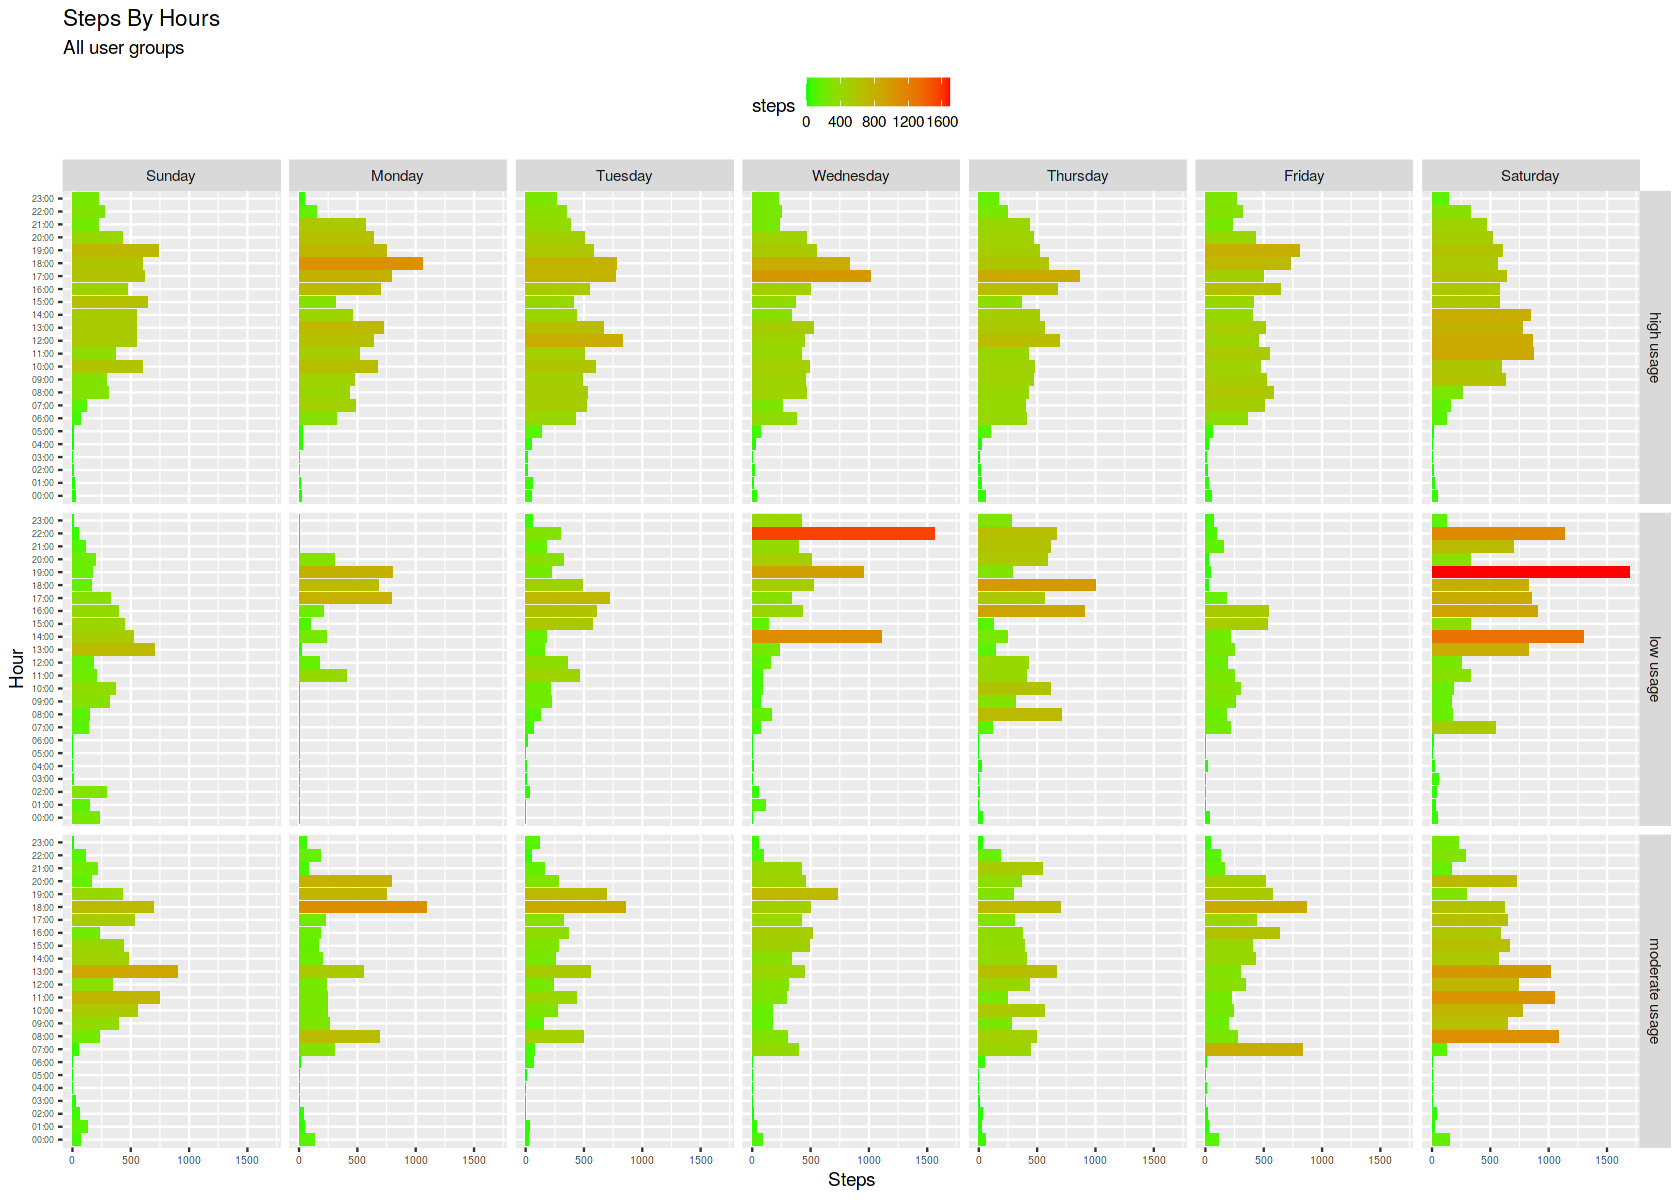

In [28]:
## prepare data
stephr_gr <- step_sleephour %>% 
  mutate(hr = format(parse_date_time(as.character(time), "HMS"), format = "%H:%M"),
        day_week = fct_relevel(day_week,
                  c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  group_by(hr, day_week, group) %>%
  summarise(steps = mean(step_total), .groups = "drop")
# Plot distribution
stephr_gr <- ggplot(stephr_gr, aes(x=hr, y=steps, fill = steps))+ 
  scale_fill_gradient(low = "green", high = "red")+
  geom_bar(stat = 'identity', show.legend = TRUE) +
  coord_flip() +
  ggtitle("Steps By Hours", "All user groups") +
  xlab("Hour") + ylab("Steps") +
  theme(axis.text.x = element_text(size=6), axis.text.y = element_text(size=5))+
  theme(legend.position = "top")+
  facet_grid(group~day_week)
options(repr.plot.width = 14, repr.plot.height = 10)
stephr_gr

- Frequent users group has a step/hour/day routine, this group tend to be most steady at taking steps across days of the week, slightly more steps on Sats compare to workdays and least steps on Suns which is normal as a rest day. The hours when the majority of steps were taken by this group is between 8:00 - 20:00 with peaks between 17:00-19:00 for the evening and around lunchtime.

- Low frequent group doesn't seem to follow any particular step/hour/day routine. There are certain hours with a particular extreme high number of steps taken (e.g, at 22:00 on a Wednesday). 

- Moderate user group had rather a bit of an intersection of both high and low frequent user characteristics: steps are taken quite symmetrically by date and time across days of the week though there is no clear "certain hour" routine of how they would schedule their exercising activity.

- Saturday seems to be the day when both Low and Moderate users made the most efforts as the most steps were taken on this day.

- Saturday seems to be a good day for exercising being favoured by all groups.

**`Q. What Are the Average Intensity Levels Per Hour for Different Groups?`**

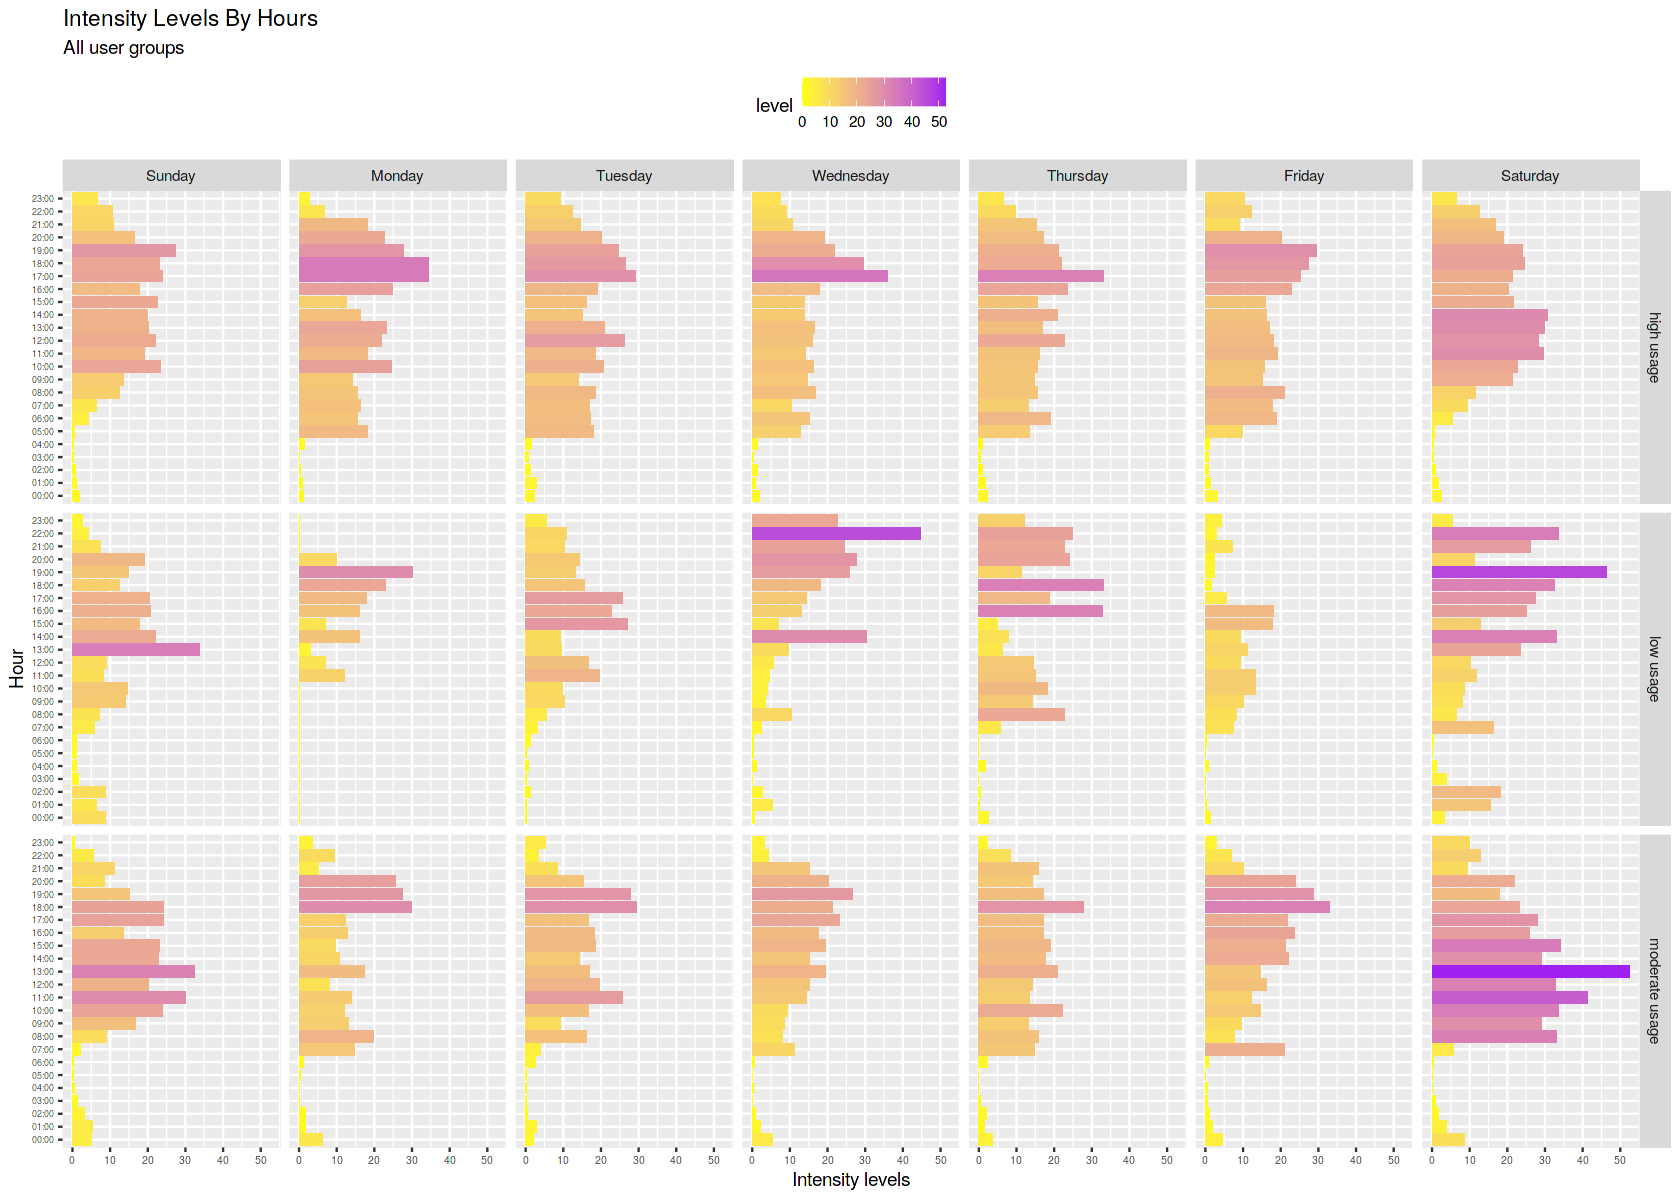

In [29]:
# prepare data
intshr_gr <- step_sleephour %>% 
  mutate(hr = format(parse_date_time(as.character(time), "HMS"), format = "%H:%M"),
        day_week = fct_relevel(day_week,
                  c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  group_by(hr, day_week, group) %>%
  summarise(level = mean(total_intensity), .groups = "drop")
# Plot distribution
intshr_gr <- ggplot(intshr_gr, aes(x = hr, y = level, fill = level))+ 
  scale_fill_gradient(low = "yellow", high = "purple")+
  geom_bar(stat = 'identity', show.legend = TRUE) +
  coord_flip() +
  ggtitle("Intensity Levels By Hours", "All user groups") +
  xlab("Hour") + ylab("Intensity levels") +
  theme(axis.text.x = element_text(size=6),axis.text.y = element_text(size=5))+
  theme(legend.position = "top")+
  facet_grid(group~day_week)
options(repr.plot.width = 14, repr.plot.height = 10)
intshr_gr

Similarly to previous observations, high-intensity hours are clustered in the evening, proving the asymmetric distribution of the values at similar hour during weekdays. However, there are few interesting points to note after observing intensity level data:

- Frequent users would keep the same *intensive level* throughout the week, with little to no major difference in their intensity levels between workdays and weekend, although they may have more hours of exercising on a Saturday as compared to the rest of the week

- Again, users from both low and moderate frequent did not seem to have a certain hour of intensity.

**`Q. What is the combined effect of other variables on total steps taken? i.e., very active, fairly active, lightly active, and even sedentary.`**

Let's check correlations of these variables based on groups

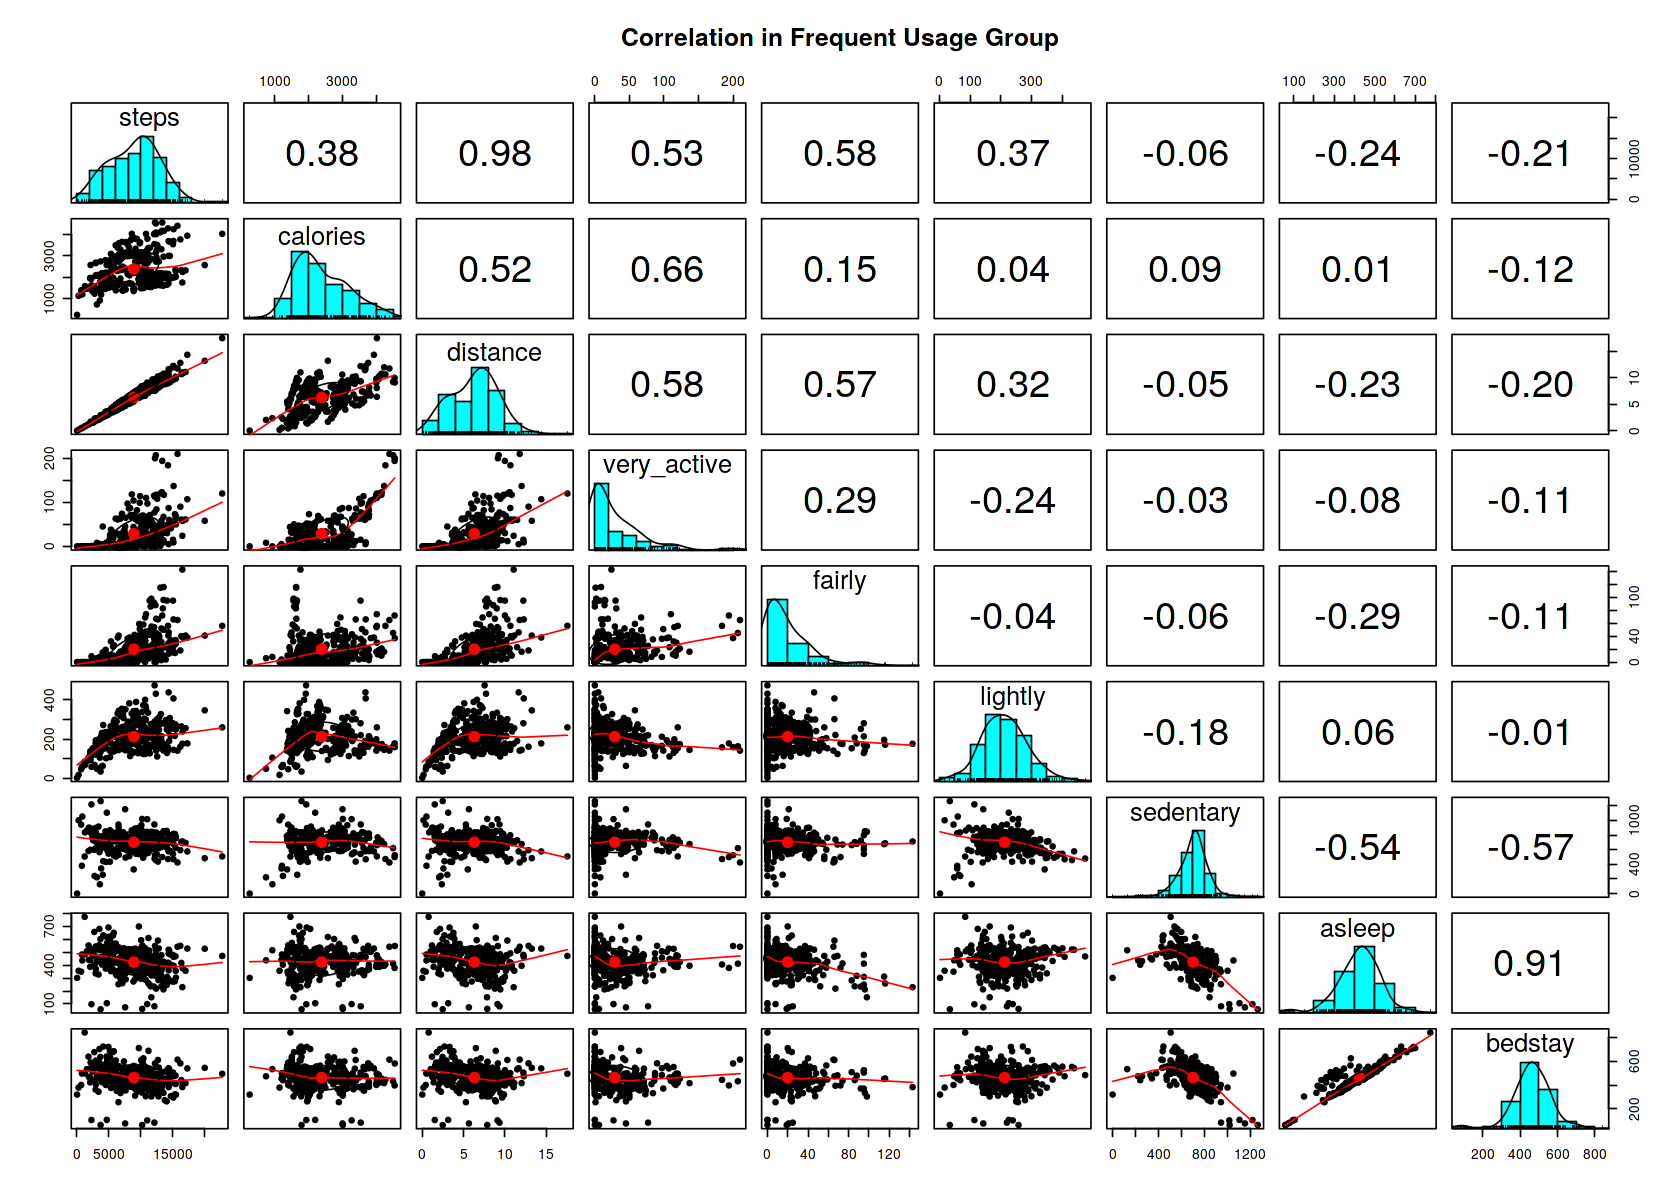

In [30]:
# Plot correlogram for "high usage" group
high_usage <- subset(usage_df, group=="high usage")
high_corr <- high_usage %>% select(-c(1:3, 11, 14, 15)) %>% 
rename(steps = total_steps,
    distance = total_distance,
    fairly = fairly_active_minutes,
         very_active = very_active_minutes,
         lightly = lightly_active_minutes,
         sedentary = sedentary_minutes,
    asleep = asleep_mins,
    bedstay = bed_mins)
pairs.panels(high_corr, pch=20, main="Correlation in Frequent Usage Group")
options(repr.plot.width = 14, repr.plot.height = 10)

**High Usage Group: Correlogram explained**

As shown in the correlogram, frequent users of smart tracking devices are those who exercise and whose physical exercise choices vary the most: from vigorous, moderate forms of exercises to light forms such as brisk walking (there are positive relations but not strong ones between the number of steps accumulated and each single intensity levels).

However, calories burned most during vigorous exercises for users in this group are due to the majority of steps during high or moderate-intensity levels of exercises. The number of calories burned is not necessarily proportional with the number of steps run or walk implicating that frequent users may have taken different forms of physical exercises.

**What predicts the number of steps per user in this group?**: More steps are generated per user in this frequent usage group when people perform longer moderate-intensity or vigorous physical activities.

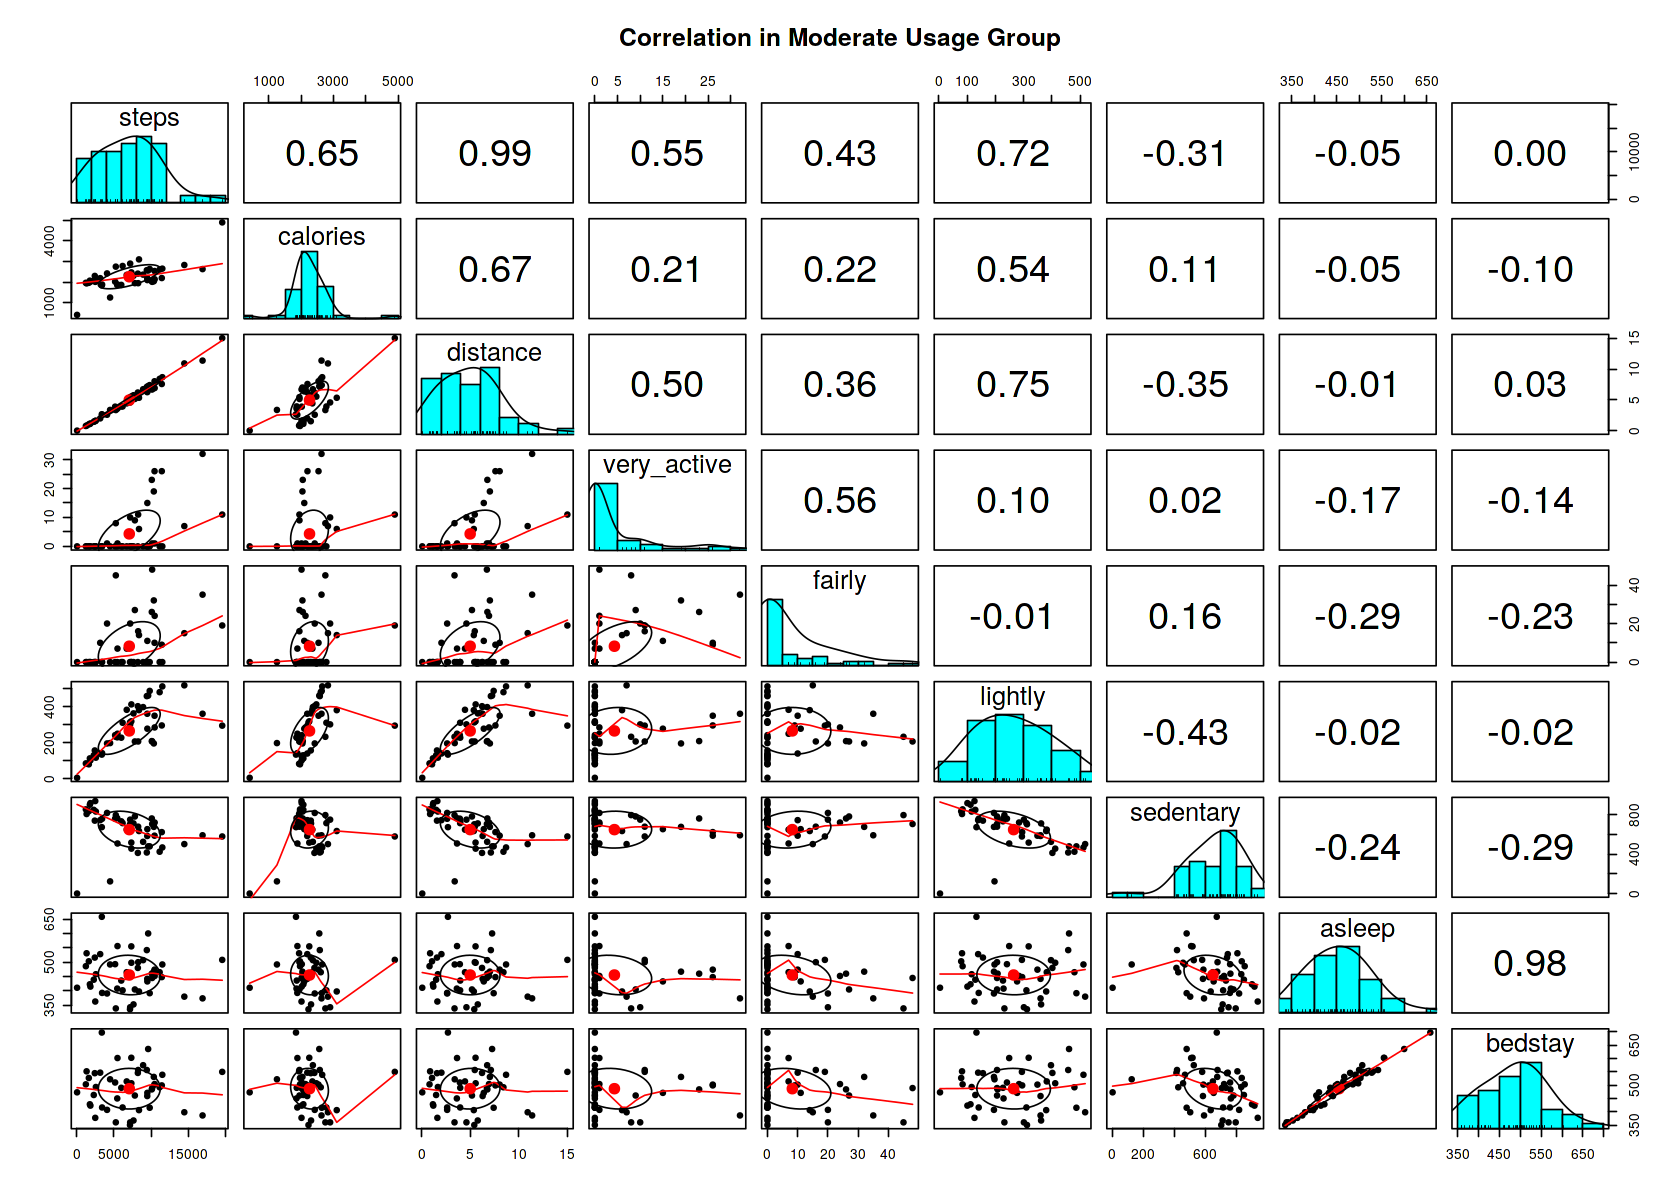

In [31]:
## Subset and Plot correlation for "moderate usage" group
moderate_usage <- subset(usage_df, group=="moderate usage")
moderate_corr <- moderate_usage %>% select(-c(1:3, 11, 14, 15)) %>% 
rename(steps = total_steps,
    distance = total_distance,
    fairly = fairly_active_minutes,
         very_active = very_active_minutes,
         lightly = lightly_active_minutes,
         sedentary = sedentary_minutes,
    asleep = asleep_mins,
    bedstay = bed_mins)
pairs.panels(moderate_corr, pch=20, main="Correlation in Moderate Usage Group")
options(repr.plot.width = 14, repr.plot.height = 10)

**Moderate Usage Group: Correlogram explained**


The correlogram shows how the total number of steps walked affected by other variables. It is most noticeable on light active activity: *lightly active* is a distinct factor contributing towards the number of steps and distance for this group. More calories are burned for users in this group when they took longer brisk walk (for example during work/study commute and in between; shopping...).
 
**What predicts the number of steps per user in this group?**: More steps are generated per user in this moderate usage group: when people take longer lightly active activities (for example work/study commute, shopping...)

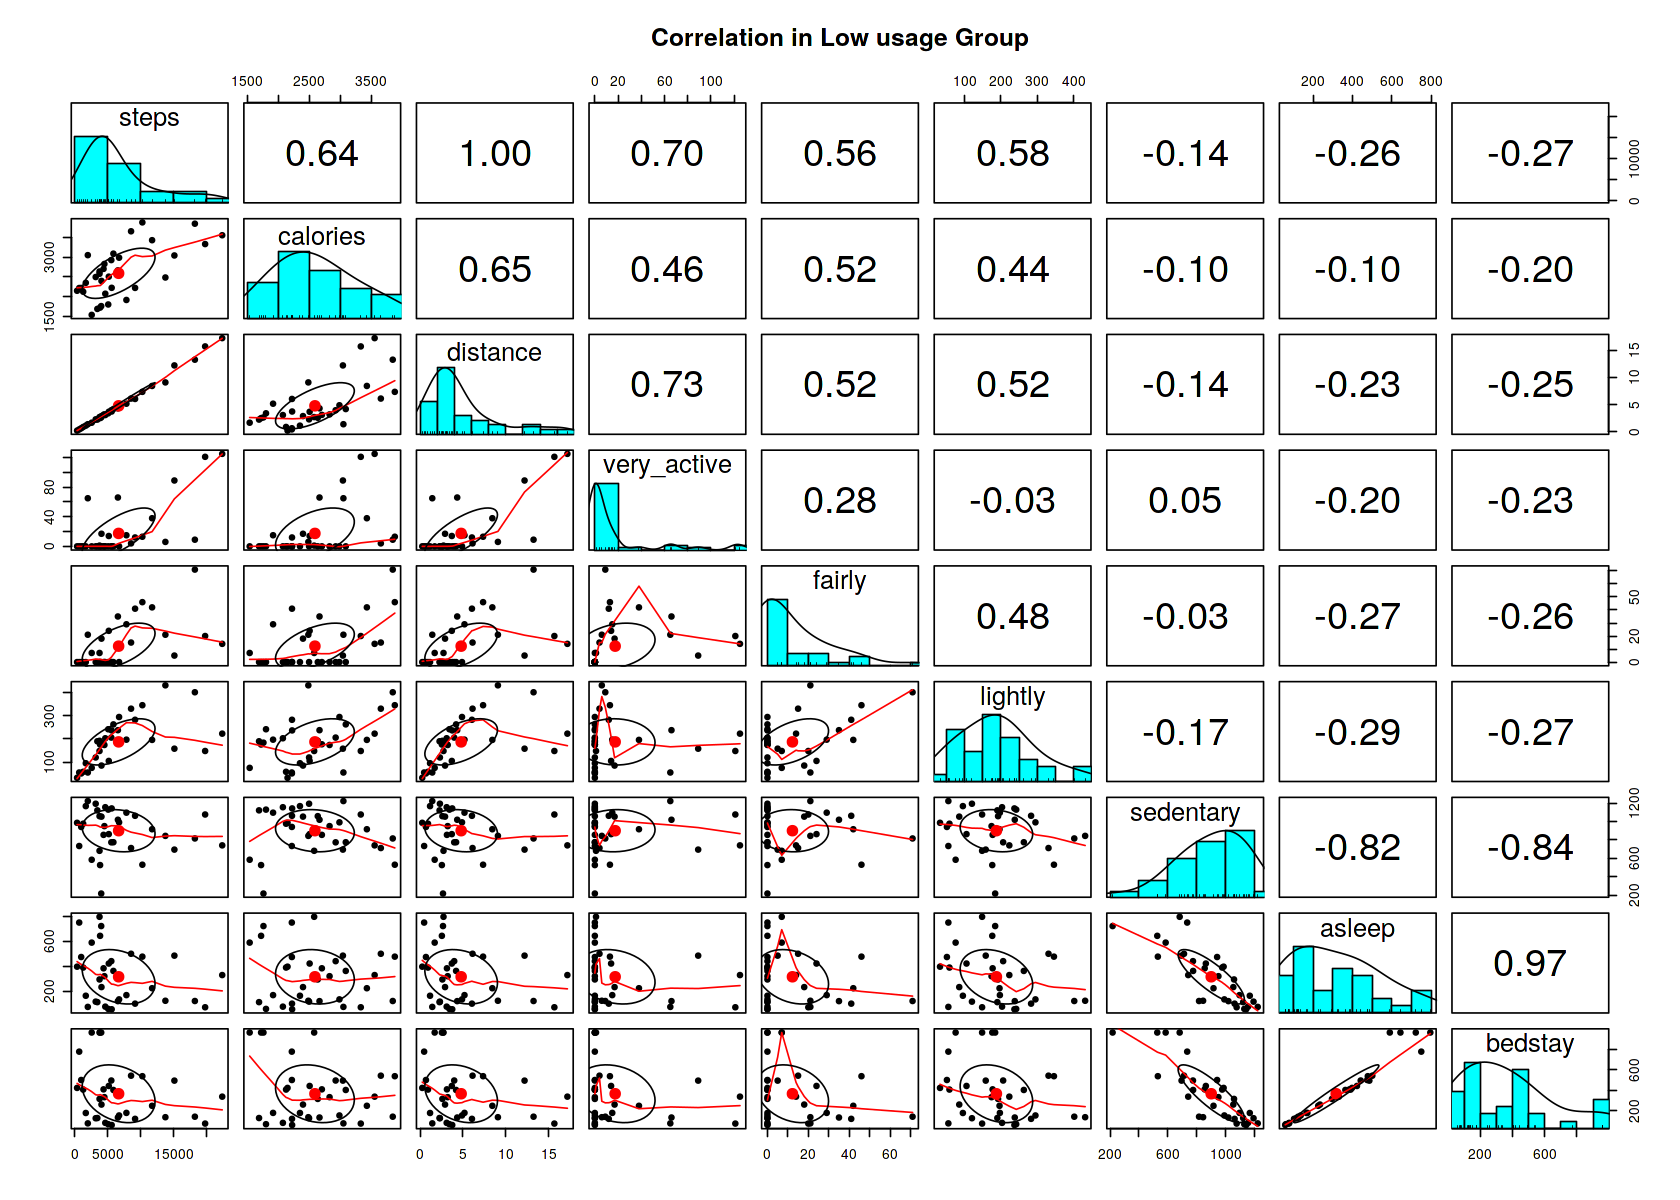

In [32]:
## Subset and Plot correlation for "low usage" group
low_usage <- subset(usage_df, group=="low usage")
low_corr <- low_usage %>% select(-c(1:3, 11, 14, 15)) %>% 
rename(steps = total_steps,
    distance = total_distance,
    fairly = fairly_active_minutes,
         very_active = very_active_minutes,
         lightly = lightly_active_minutes,
         sedentary = sedentary_minutes,
    asleep = asleep_mins,
    bedstay = bed_mins)
pairs.panels(low_corr, pch=20, main="Correlation in Low usage Group")
options(repr.plot.width = 14, repr.plot.height = 10)

**Low Usage Group: Correlogram explained**

The number of steps generated from the group of users who least used their devices (<10 days) came from vigorous sessions of exercises - there is a strong positive relation between very active minutes and steps (r = 0.70).
*Number of steps* accumulated most during *very active* sessions of exercises, whilst *calories burned* most when there is an increase in *distance* travelled.

**What predicts the number of steps per user in this group?**: More steps are generated per user in this low usage group when people involve in longer vigorous physical active activities.

**`Q. How do steps and intensity correlate among groups?`**

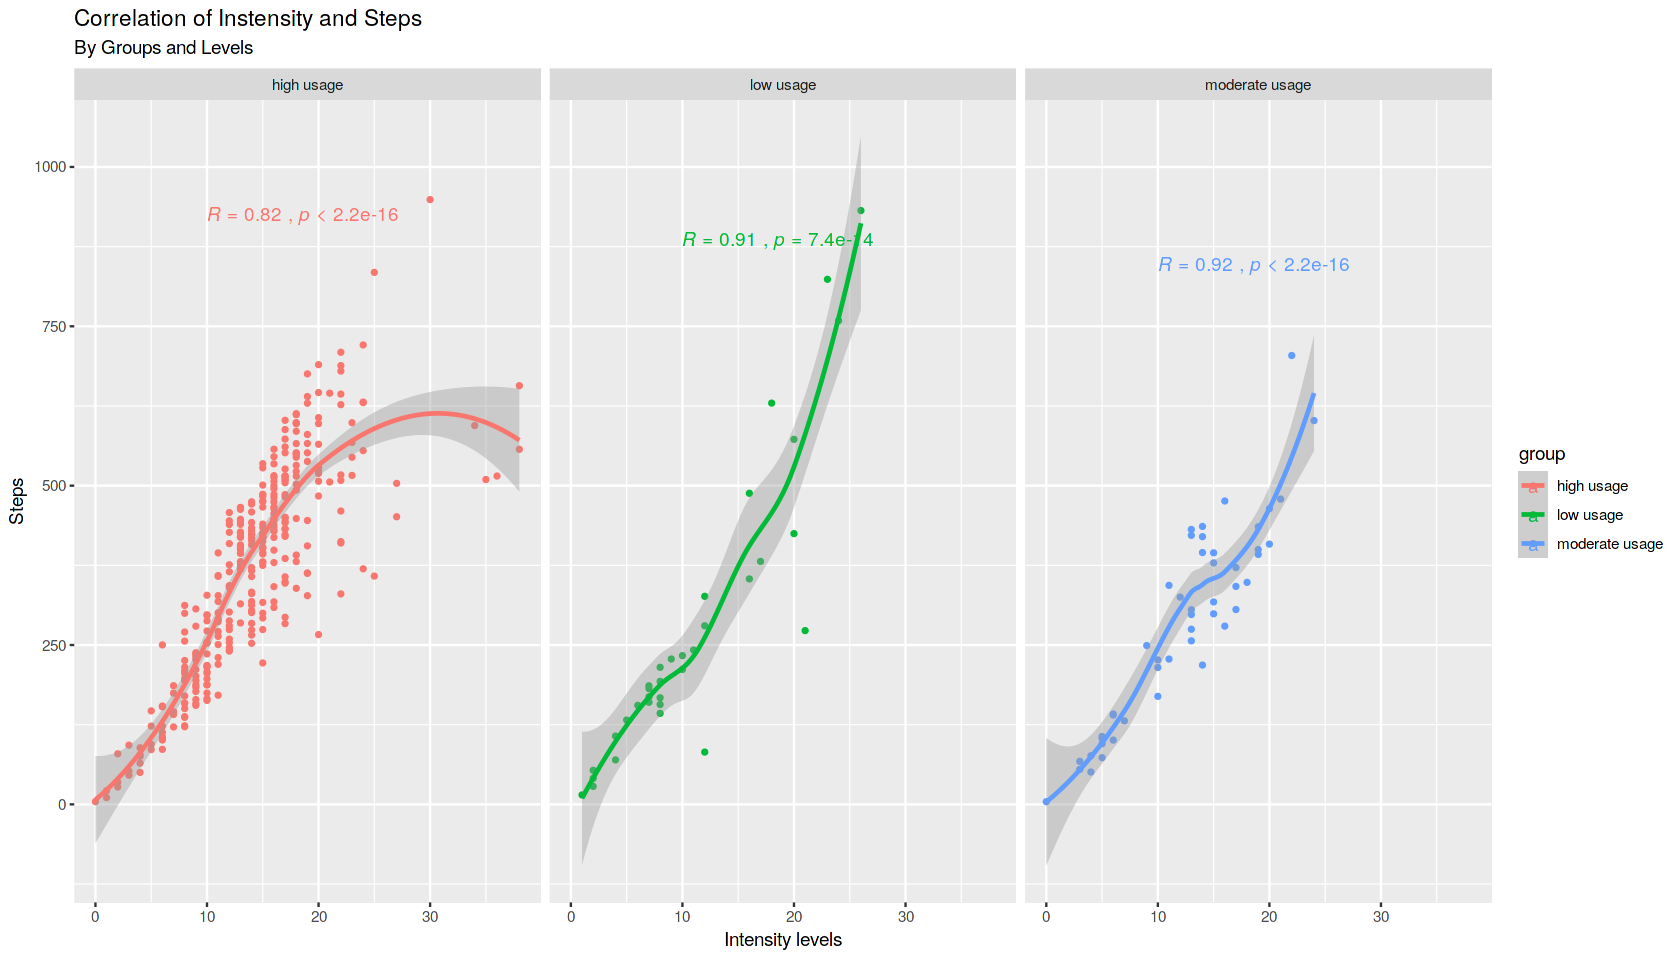

In [33]:
# Scatter plot correlation between intensity/steps
ints_step <- step_sleephour %>% 
  group_by(group, id, date) %>% 
  summarise(intensity = round(mean(total_intensity),0),
            steps = round(mean(step_total),2), .groups = "drop") %>% 
ggplot(aes(x= intensity, y = steps, color = group, show.legend = FALSE))+ 
         geom_point(size = 1)+
geom_smooth(method = 'loess', formula = y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Steps")+
  ggtitle("Correlation of Instensity and Steps", "By Groups and Levels")+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 8)
ints_step

**`Q. How do Intensity and Distance correlate among groups?`**

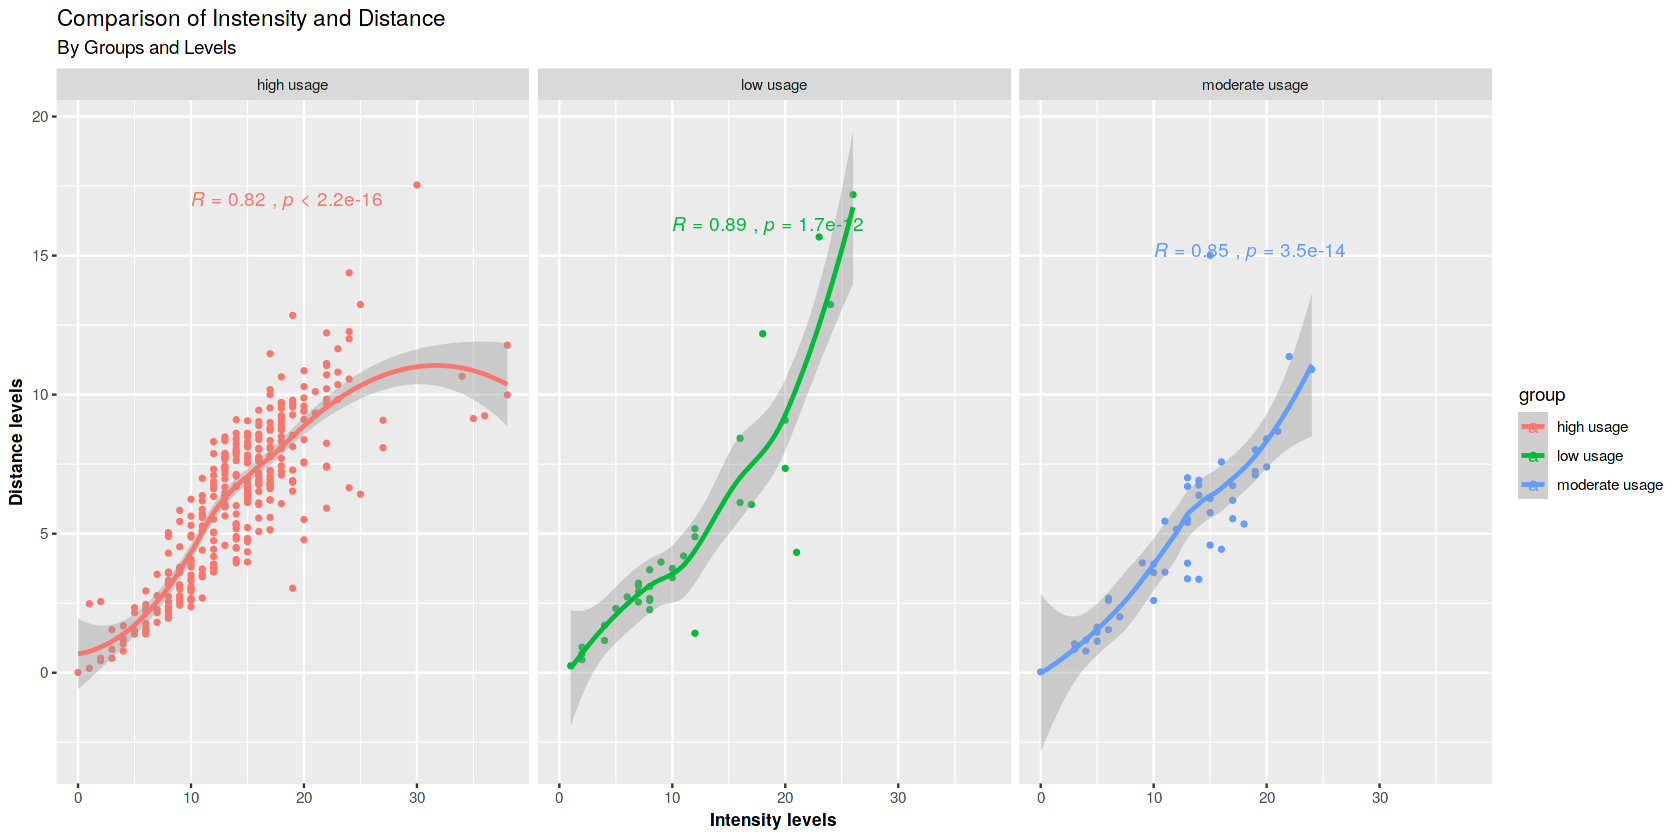

In [34]:
# Scatter plot correlation between intensity/distance
ints_dist <- step_sleephour %>% 
  group_by(group, id, date) %>% 
  summarise(intensity = round(mean(total_intensity),0),
            distance = round(mean(total_distance),2), .groups = "drop") %>% 
ggplot(aes(x= intensity, y = distance, color = group, show.legend = FALSE))+ 
         geom_point(size = 1)+ geom_smooth(method = 'loess', formula= y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Distance levels")+
  ggtitle("Comparison of Instensity and Distance", "By Groups and Levels")+
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 7)
ints_dist

The correlograms show strong positive relations between *steps walked* and *intensity levels* and *distance* and *intensity levels* among all three groups. 

- Number of *steps walked* is greater as users increase their *levels of intensity* particularly for **low** and **moderate** usage groups.
- The more *vigorously* one performs the further *distance* levels made, this is more significant for **low** and **moderate** groups of users.
- In general, **high** usage group has a slightly less significant correlation compare to the other two in both terms.

**`Q. How do Steps and Calories correlate among groups?`**

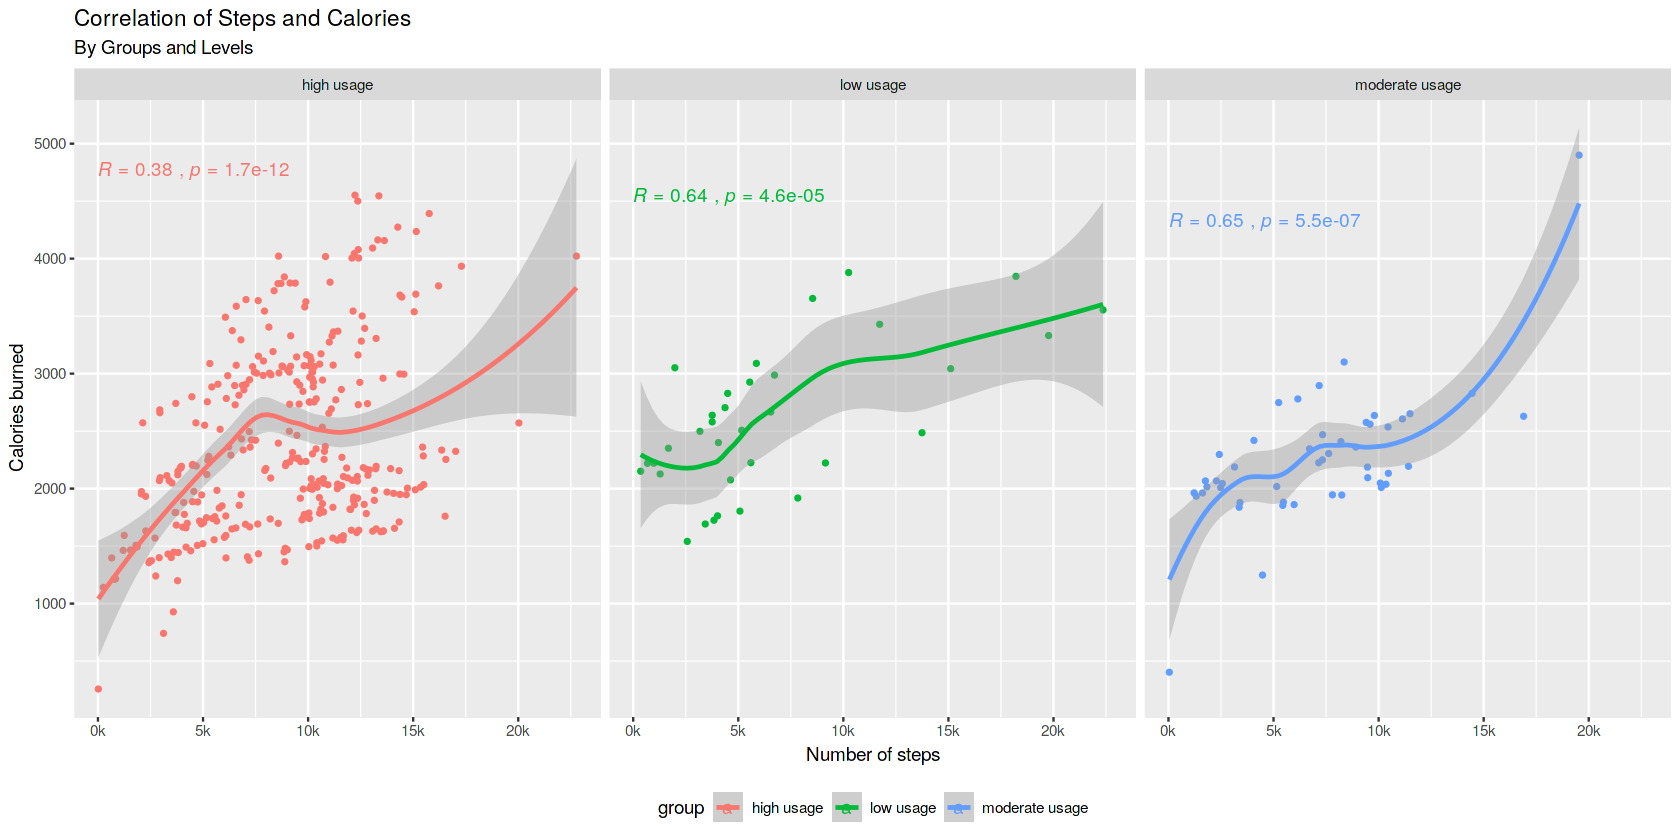

In [35]:
# Scatter plot correlation between Steps and Calories 
steps_cals <- usage_df %>% 
  group_by(group, date, id) %>% 
  summarise(cals = round(mean(calories),0),
            steps = round(mean(total_steps),2), .groups = "drop")
  
ks <- function (steps) { number_format(accuracy = 1,  scale = 1/1000,suffix = "k",big.mark = ",")(steps) }  
                                 
ggplot(steps_cals, aes(x= steps, y = cals, color = group))+ 
         geom_point(size = 1)+ geom_smooth(method = 'loess', formula= y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Number of steps" , y="Calories burned")+
  ggtitle("Correlation of Steps and Calories", "By Groups and Levels")+
  theme(legend.position = "bottom")+
  scale_x_continuous(labels = ks)+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 7)

- People with more frequent use of their smart devices show a weak correlation to calories and their steps walked.
- Low and moderate groups on the contrary show higher correlations (though not necessarily strong) between these two variables.

<h1 id="heading6">
6. Discussion
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading6/">¶</a>
</h1>

#### A. Features usage:

Of a total of thirty users, **33** unique Ids (Some users may have more than just one id or device) used daily and hourly step count function, compared to that of **24** unique IDs for sleep tracking, **14** heart-rate tracking and just only **8** of them used the device to manage their weight. This can be explained as according to [CCS Insight](https://www.ccsinsight.com/press/company-news/1957-clear-marketing-needed-to-drive-sales-of-smartwatches-and-fitness-trackers/) "*[There is a 49% of] people who don’t understand the benefits of smartwatches,...some of the functions appeal to them*".

There are two questions to consider here: 

1. What is the consumer's primary interest to pick up a fitness-focused wearable device (e.g, preference of functions)?
1. Is there an issue with product features and the ease of use? (i.e, syncing, integrating, charging, comfortableness, etc.). 

#### B. Daily and hourly usage:

Given that there is no information on which fitness trackers were worn by users in this data sample, we do know though STEPS and SLEEP tracking features had been used by these users. Data has revealed that most users fell into three different segments based on their use of smart devices. They can be separated into distinct groups of: 
1. Those who are regularly wearing the device and keen on working towards daily goals. 
2. Those who wear the device every few days but not working out.
3. Those who use wearable fitness device only sometimes in the period but would intensively work out when into it.

***
<div style="
           display:fill;
           border-radius:10px;
           background-color: #F0FFD8;
            letter-spacing:0.5px">
<p style="padding: 10px">
    
According to [Fitbit.com](https://dev.fitbit.com/build/reference/web-api/activity/), "*Fitbit converts raw acceleration data into activity counts in 60-s sampling intervals that define activity intensities as 0 = sedentary, 1 = light PA, 2 = moderate PA, and 3 = vigorous PA*"

**0** = Sedentary time is likely long hours spent sitting at work or study, etc.

**1** = lightly active time is time made up mostly when user briskly walks during the day (for example - work commute and in between, shopping...).

**2, 3** = fairly active, very active time are likely general exercises/training depending on user's intensity levels, time duration expected to be shorter than those two above variables.
    
***

Aligning all that with the above analysis, we can draw some conclusion here for all user groups:

***

**THE KEEN USERS** or **high usage group** `(with 21 ~ 31 days of smart device usage):` 

Half of users in this sample are wearing their devices almost every day OR concerned about their daily steps count and sleeping patterns AND presumably cared about keeping their data synced regularly. These are the everyday users who generally want to hit their daily goal following a clear timing schedule. 

**Group's characteristics:**

(a) Frequent users of smart tracking devices are those who exercise and whose physical exercise choices vary the most: from vigorous, moderate forms of exercises to light forms such as brisk walking (there are positive relations but not strong ones between the number of steps accumulated and each single intensity levels). The longest active minutes were spent for this group, there are even a few users who go to an extremely high amount of active time. 

(b) **Typical day/week**: Light activity of 3.5 hours (such as work/school commute, brisk walking during work/study) and some 12 hours of sitting hours. They would steadily stick with their bedtime routine and had sufficient sleep and tend to have longer hours of sleep/bed-rest over the weekend.

(c) **Exercise/Rest patterns**: Frequent users have a regular exercise routine (as of *steps*, *hourly* and *daily*) towards their daily goals - steady at taking steps across days of the week and particularly more intense at the beginning of the week (Mons-Tues) and slightly more steps on Sats compare to workdays and least steps on Suns which is normal as a rest day. The hours when the majority of steps were taken by this group is between 8:00 to 20:00 with peaks are at between 17:00-19:00 for the evening after work and around lunchtime. 

(d) **Daily goals**: Great number of steps and a fair number of calories burned is what this group aims at (9,500 steps / 2,200 cals).

(e) **Types of physical exercises**: Most of the number of calories burned from *vigorous exercises* for users in this group, similarly, the majority of steps were generated during *high or moderate-intensity* levels of exercises. The number of calories burned is not necessarily proportional with the number of steps run or walk implicating that frequent users may have taken different forms of physical exercises.

(f) Frequent users would also keep the same *intensive level* throughout the week and at similar hours (especially in the evening after work as in *(c)*), with little to no significant difference in their intensity levels between workdays and weekend, although they may have more hours of exercising on a Saturday as compared to the rest of the week. 

***

**THE MODERATE USAGE GROUP** `(11 ~ 20 days of smart device usage):` 

There is a minimum proportion of users (12%) who maintained *wearing their devices moderately* OR *slightly concerned about reaching their weekly goals*. They may not work out as much compared to the other two groups. Participants walked fewer steps during weekdays and compensate for the loss in steps during the weekend with the majority of steps accumulated from light movements such as brisk walking. They may have a slightly similar hourly step pattern to the "keen ones" but tend to remain much less intensive, even lesser than the low usage ones. 

**Group's characteristics**:

(a) **Exercise/Rest pattern**: This group of users doesn't seem to follow any particular exercise routine but steadily stuck with their bed routine and had sufficient sleep.

(b) **Typical day/week**: smart devices' moderate usage group tends to spend **most** hours in *low active* activities such as commute time and between; brisk walk, shopping etc. (4 hrs) and **least** *sitting/inactive* hours than other groups (8.7 ~ 12.7 hrs). Very lightly active during weekday evenings (around 18:00 ~ 20:00) but mostly active over the weekend. Many users would make their most efforts to exercise on a Saturday (with peaks around noon and afternoon).

(c) **Goals**: moderate number of steps and a fair number of calories burned is what this group aims at (7,300 steps / 2,200 cals).

(d)**Types of physical exercises**: *lightly form of activities* is a distinct factor contributing towards *number of steps accumulated* and *calories burned* for this group. More steps and calories are accumulated when people take long brisk walk such as work/study commute and in between; shopping...

(e) Moderate usage group has rather a bit of an intersection of both high and low frequent user characteristics: steps are taken quite symmetrically by date and time across days of the week though there is no clear "certain hour" routine of how they would schedule their exercising activity. 

*****

**THE LOW USAGE GROUP** `(less than 10 days of smart device usage):` 

There is a far less than half proportion of users (38%) who are wearing their devices sometimes OR presumably not at all concerned syncing their data. They don't mind being flexible in timings and intensity. Though not fit into any particular schedule, they try to keep themselves moving as much as possible when doing it. 

**Group's characteristics:**

(a) **Exercise schedule/rest routine**: This group doesn't seem to follow any *step/hour/day* schedule nor rest/sleep patterns. Saturday seems to be the day when users made the most efforts as the most steps were taken on this day. They don't have a certain hour of intensity, though there are even a few users with extremely high amount of active time and unusual hour when a large number of steps taken (e.g, at 22 o'clock on a Wednesday). 

(b) **A typical day**: they have the longest number of sitting / inactive hours among the three (12.5 ~ 18 hrs); sleep hours and rest hours varied the most (2-6 hrs).

(c) **Daily goals**: *low number of steps* with *high number of calories burned* is what the group aims at (4,900 steps / 2,500 cals).

(d) **Types of physical exercises**: Most steps generated from **vigorous sessions of workouts**. *Number of steps* accumulated most during *very active* sessions of exercises, whist *calories burned* most when there is an increase in *distance* travelled.

#### C. Technical issues and barriers:

There is at least half of users who did not **keep the device on** or **wear the device** or **have tracked data** in the given period. That means 0 values in all data could be when the device was either charging or not worn or not synced properly.

#### D. Limitation of data:

The sample population is relatively small, and data sets have been anonymously contributed by users, potentially from different places - not knowing relevant information such as the gender, age, location, lifestyle or weather conditions, unfortunately, limits the scope of analysis that can be performed.

(more at [data validity](#valid))

<h1 id="heading7">
7. Recommendations
<a class="anchor-link" href="https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-withr/heading7/">¶</a>
</h1>

> **Increase Product Involvement**

*1 - Via App Communication:*
Each user group may have different intentions (daily targets) and lifestyle toward their daily activities. However, owning a device and capturing the information is just the first step, then we all have to take action. One way to do this is to enhance user experiences by giving real-time feedback to users - providing regular daily (even hourly) engagement with users of each group so that they can make quick informed decisions to optimize their routine and through this *product involvement* increases.

*2 - Via Device Integration:*
- Considering to enhance the product's interaction and integration with other smart devices that the user may have in a more consistent way. For example, make it more possible to sync all the data into the user's smartphone, making it useful to track activity progress and thus *product involvement* will increase.
- Device integration also means the easiness to switch from a device to another.

> **Niche-market To Consider**

- There is a great proportion of the number of users who would wear the device every day or every few days (88%) and who would intensively exercise out of their *nine-to-five* schedule. Perhaps a *2-in-1* with a rather "sturdy look" yet still fashionable, jewellery-inspired design with useful health-tracking features SMARTWATCH could be a good fit for those female users in the current *high* and *low usage* groups (whilst Leaf is already a good fit for the *moderate* ones or any users of any group who would wear it to sleep while tracking their sleep patterns).

> **Device's Accuracy**

Improving a product's accuracy in measurement is crucial to any fitness devices, such features as sensor, connectivity and charging help preventing losing meaningful data - an important point to get a consumer to understand the usefulness of the product they own and get them to act.

> **Further Research**

Surveys to be sent out when necessary in order to gain a more in-depth knowledge of consumer behaviour such as:
- Consumers' primary interest to pick up a fitness-focused wearable device (e.g, preference of functions)?
- Is there an issue with the ease of use of the device? i.e, syncing, integrating, charging, comfortableness for the user to sleep on with. 
- Is there a relation between data absence and the ease of use of product features ?

*******